***Credit Score Card Management*** version by TeetyK

dataset : loan_data_2007_2014 from https://www.kaggle.com/datasets/devanshi23/loan-data-2007-2014/

# import Data & Libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [19]:
loan_data = pd.read_csv('.\\datasets\\loan_data_2007_2014.csv')

C:\Users\home\AppData\Local\Temp\ipykernel_56928\3429229190.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('.\\datasets\\loan_data_2007_2014.csv')


In [20]:
loan_data = loan_data.drop(columns=[loan_data.columns[0]])

# Data Exploration

In [21]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [23]:
na_val = loan_data.isnull().mean()
na_val[na_val > 0.8]

mths_since_last_record       0.865666
annual_inc_joint             1.000000
dti_joint                    1.000000
verification_status_joint    1.000000
open_acc_6m                  1.000000
open_il_6m                   1.000000
open_il_12m                  1.000000
open_il_24m                  1.000000
mths_since_rcnt_il           1.000000
total_bal_il                 1.000000
il_util                      1.000000
open_rv_12m                  1.000000
open_rv_24m                  1.000000
max_bal_bc                   1.000000
all_util                     1.000000
inq_fi                       1.000000
total_cu_tl                  1.000000
inq_last_12m                 1.000000
dtype: float64

In [24]:
# ลบ data ที่ missing 80%
loan_data.dropna(thresh = loan_data.shape[0]*0.2,axis=1,inplace=True)
loan_data.drop(columns=['id','member_id','sub_grade',
                'emp_title','url','desc','title','zip_code'
                ,'next_pymnt_d','recoveries','collection_recovery_fee',
                'total_rec_prncp','total_rec_late_fee'],inplace=True)

In [25]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_d                      466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

# Handle Outiler/Missing

In [26]:
loan_data['loan_status'].value_counts(normalize=True)

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: proportion, dtype: float64

In [27]:
# 0 คือลูกค้าไม่ดี 1 คือลูกค้าดี ไม่มีติดหนี้ค้างชำระ
loan_data['good_bad'] = np.where(loan_data.loc[:,'loan_status'].isin(['Charged Off','Default','Late (31-120 days)',
                'Does not meet the credit policy. Status:Charged Off']),0,1)
loan_data.drop(columns=['loan_status'],inplace=True)

In [28]:
loan_data['good_bad'].tail()

466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, dtype: int32

# Split Data & Transform data

In [29]:
def emp_length_converter(df,column):
    df[column] = df[column].str.replace('\+ years','',regex=True)
    df[column] = df[column].str.replace('< 1 year',str(0),regex=True)
    df[column] = df[column].str.replace(' years','',regex=True)
    df[column] = df[column].str.replace(' year','',regex=True)
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value=0,inplace=True)
emp_length_converter(loan_data,'emp_length')

In [33]:
def loan_term_converter(df,column):
    df[column] = pd.to_numeric(df[column].str.replace(' months',''))
loan_term_converter(loan_data,'term')

In [36]:
import pandas as pd
import re

def parse_mon_yy_auto(x):
    """
    แปลงค่าเป็น datetime โดยใช้ regex สกัดเดือนและปี
    ปี 2 หลักจะถูกบวก 2000+
    """
    if pd.isnull(x):
        return pd.NaT
    x = str(x).strip()
    
    match = re.match(r'([A-Za-z]{3})-(\d{2})', x)
    if match:
        month_str, year_str = match.groups()
        year = 2000 + int(year_str)
        # สร้าง string แบบ '1 Jan 2014' ให้ pandas parse อัตโนมัติ
        date_str = f"1 {month_str} {year}"
        try:
            return pd.to_datetime(date_str)
        except:
            return pd.NaT
    return pd.NaT

loan_data['issue_d'] = loan_data['issue_d'].apply(parse_mon_yy_auto)
loan_data['issue_d'] = loan_data['issue_d'].dt.strftime("%d/%m/%Y")
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(parse_mon_yy_auto)
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].dt.strftime("%d/%m/%Y")
loan_data['last_pymnt_d'] = loan_data['last_pymnt_d'].apply(parse_mon_yy_auto)
loan_data['last_pymnt_d'] = loan_data['last_pymnt_d'].dt.strftime("%d/%m/%Y")
loan_data['last_credit_pull_d'] = loan_data['last_credit_pull_d'].apply(parse_mon_yy_auto)
loan_data['last_credit_pull_d'] = loan_data['last_credit_pull_d'].dt.strftime("%d/%m/%Y")



In [37]:
def date_columns(df,column):
    today_date = pd.to_datetime("2020-08-01")
    df[column] = pd.to_datetime(df[column])
    df['mths_since_'+column] = (today_date.year - df[column].dt.year) * 12 + (today_date.month - df[column].dt.month)
    df['mths_since_'+column] = df['mths_since_'+column].apply(lambda x: df['mths_since_'+column].max() if x < 0 else x)
    df.drop(columns =[column] , inplace=True)
date_columns(loan_data,'earliest_cr_line')
date_columns(loan_data,'issue_d')
date_columns(loan_data,'last_pymnt_d')
date_columns(loan_data,'last_credit_pull_d')

In [34]:
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,5000,5000,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,...,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
2,2400,2400,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
3,10000,10000,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,...,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
4,3000,3000,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60,14.47,432.64,C,4.0,MORTGAGE,110000.0,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,1
466281,22000,22000,22000.0,60,19.97,582.50,D,10.0,MORTGAGE,78000.0,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0,0
466282,20700,20700,20700.0,60,16.99,514.34,D,7.0,MORTGAGE,46000.0,...,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0,1
466283,2000,2000,2000.0,36,7.90,62.59,A,3.0,OWN,83000.0,...,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0,1


In [40]:
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,...,INDIVIDUAL,0.0,NaN,NaN,NaN,1,247.0,115,67.0,55.0
1,2500,2500,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,...,INDIVIDUAL,0.0,NaN,NaN,NaN,0,247.0,115,91.0,91.0
2,2400,2400,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,...,INDIVIDUAL,0.0,NaN,NaN,NaN,1,235.0,115,79.0,55.0
3,10000,10000,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,...,INDIVIDUAL,0.0,NaN,NaN,NaN,1,247.0,115,67.0,67.0
4,3000,3000,3000.0,60,12.69,67.79,B,1.0,RENT,80000.0,...,INDIVIDUAL,0.0,NaN,NaN,NaN,1,247.0,115,55.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60,14.47,432.64,C,4.0,MORTGAGE,110000.0,...,INDIVIDUAL,0.0,0.0,294998.0,29900.0,1,211.0,79,55.0,55.0
466281,22000,22000,22000.0,60,19.97,582.50,D,10.0,MORTGAGE,78000.0,...,INDIVIDUAL,0.0,0.0,221830.0,39400.0,0,247.0,79,79.0,55.0
466282,20700,20700,20700.0,60,16.99,514.34,D,7.0,MORTGAGE,46000.0,...,INDIVIDUAL,0.0,0.0,73598.0,13100.0,1,235.0,79,55.0,67.0
466283,2000,2000,2000.0,36,7.90,62.59,A,3.0,OWN,83000.0,...,INDIVIDUAL,0.0,0.0,591610.0,53100.0,1,211.0,79,79.0,67.0


<Axes: >

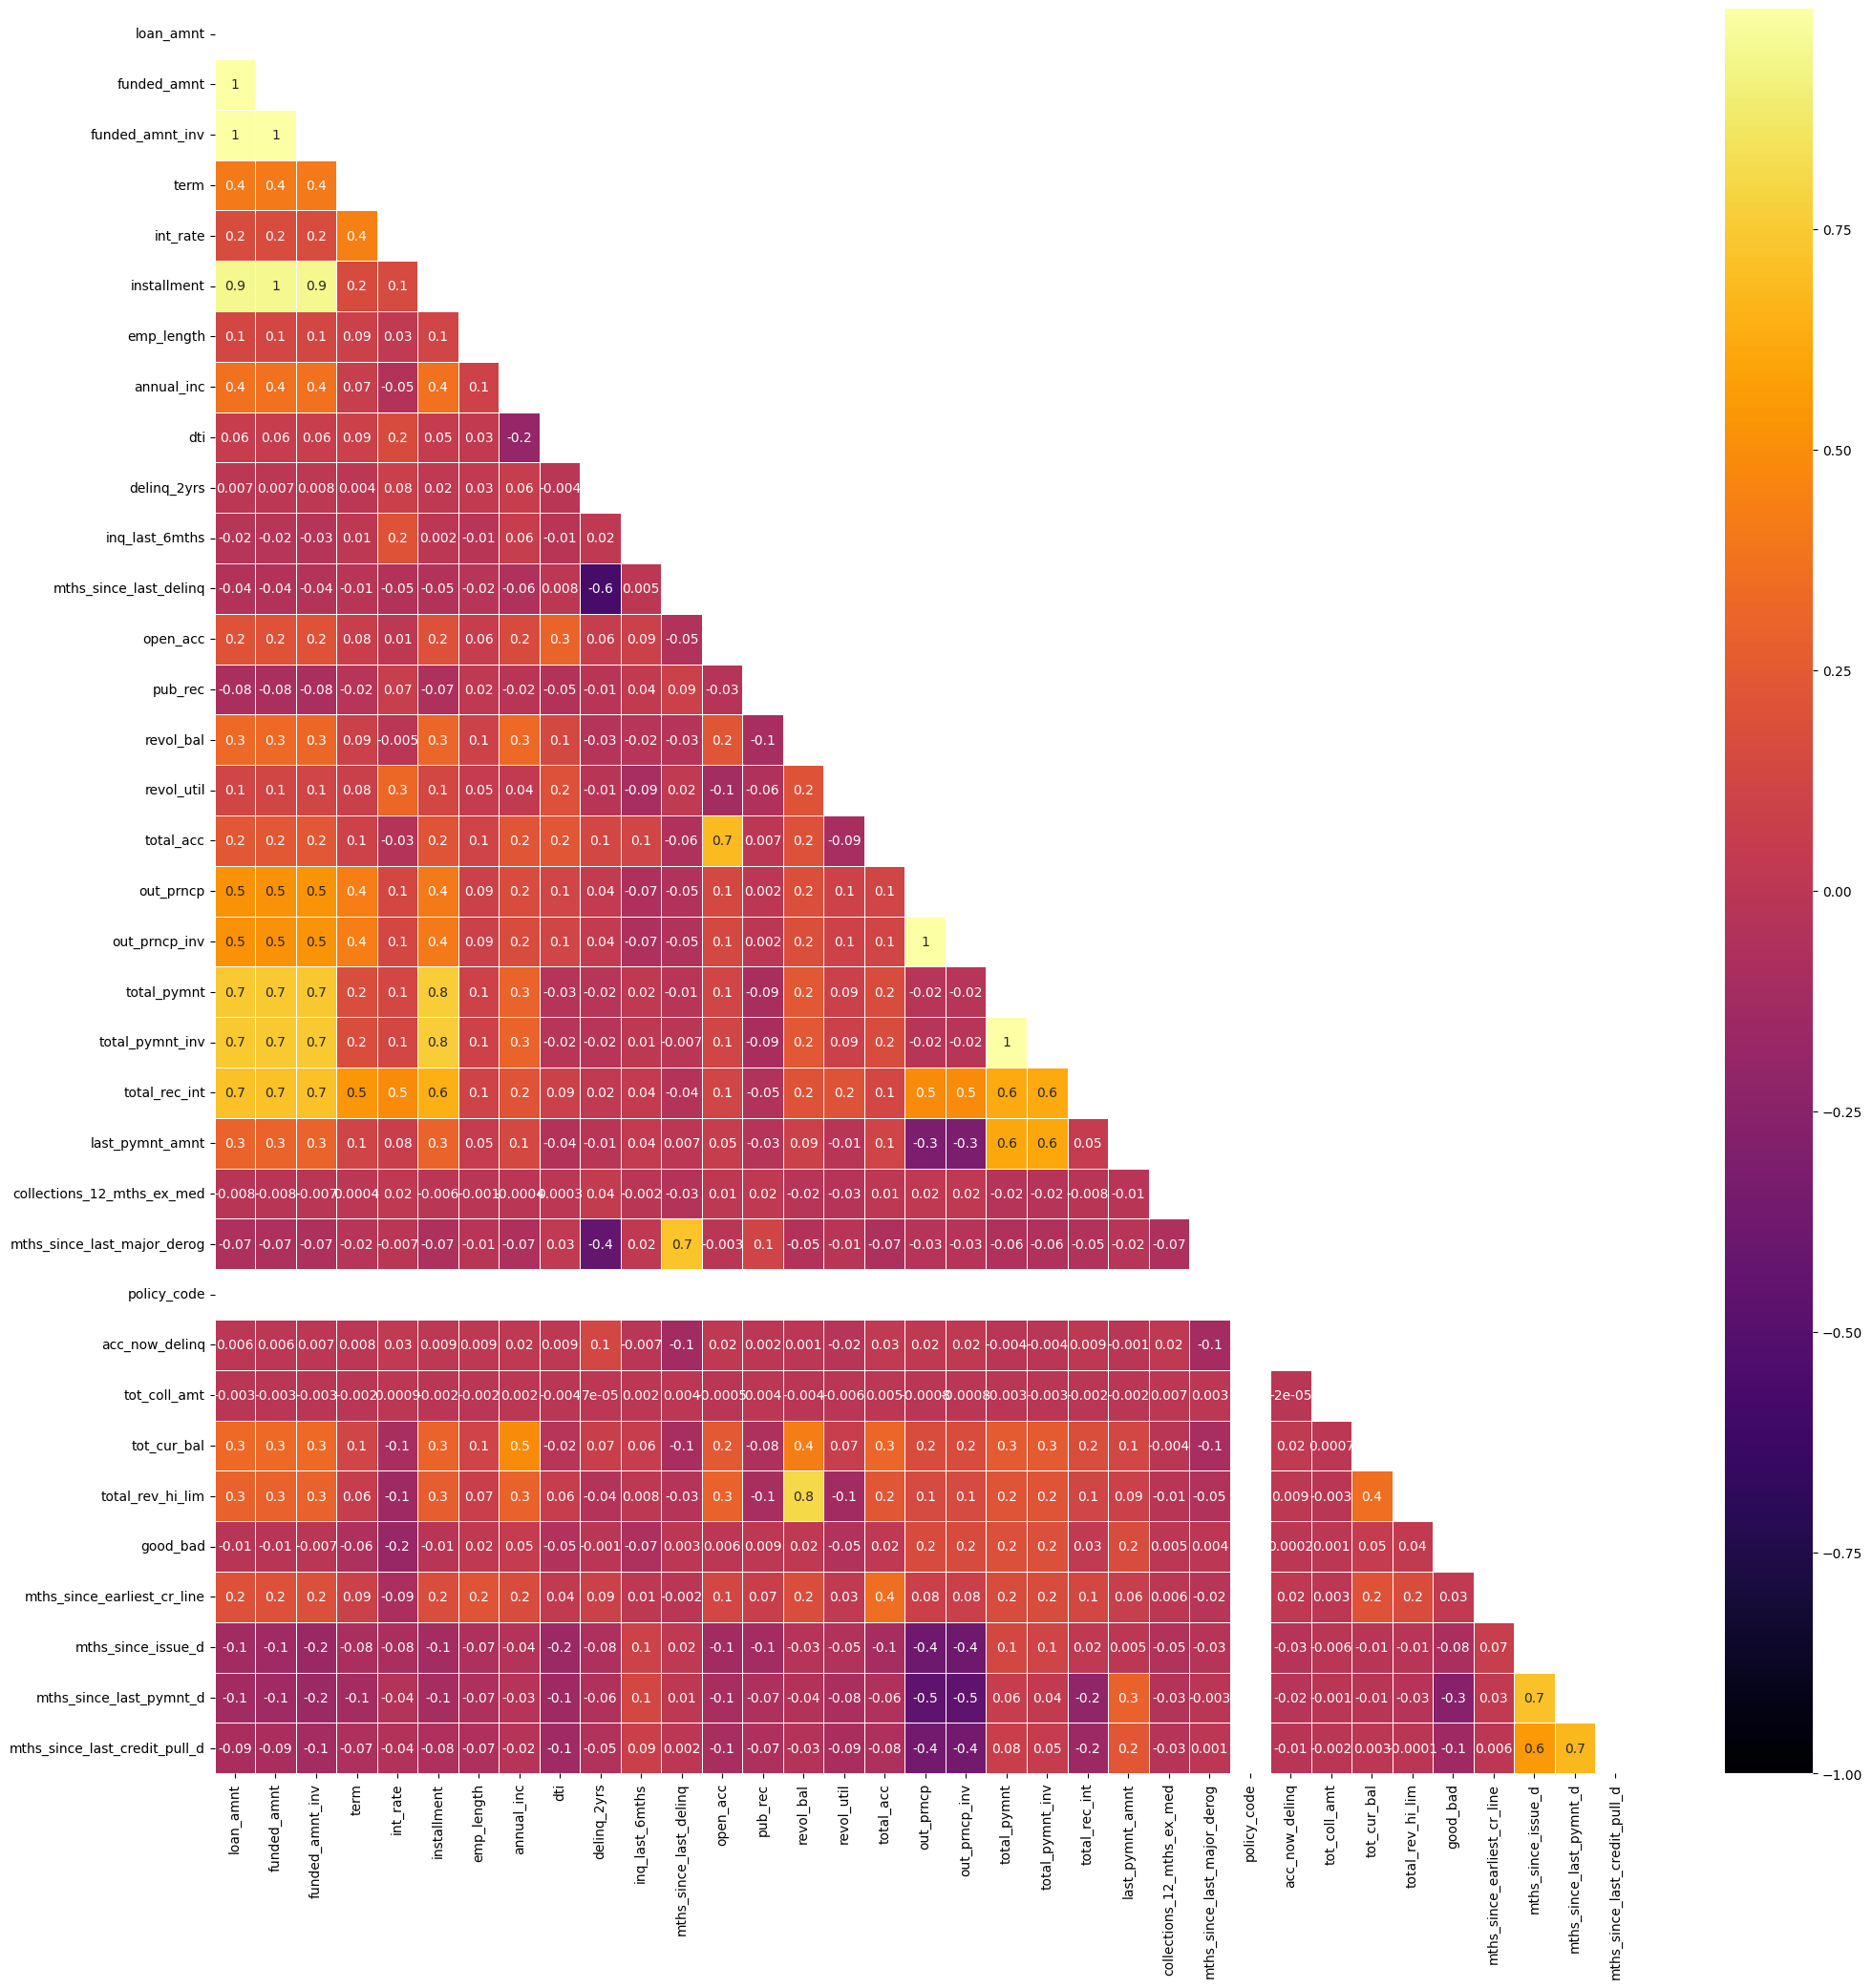

In [51]:
import numpy as np 
# mask = np.zeros_like(loan_data.corr(numeric_only=True).fillna(0),dtype=bool)
mask = np.zeros_like(loan_data.select_dtypes(include=np.number).corr().fillna(0), dtype=bool)
# display(mask)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(loan_data.select_dtypes(include=np.number).corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

In [53]:
X = loan_data.drop('good_bad',axis=1)
y = loan_data['good_bad']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify= y)
X_train , X_test = X_train.copy() , X_test.copy() # avoid SettingWithCopyWarning

In [54]:
print(X_train['mths_since_earliest_cr_line'].describe())
print(X_train['mths_since_issue_d'].describe())
print(X_train['mths_since_last_pymnt_d'].describe())
print(X_train['mths_since_last_credit_pull_d'].describe())

count    373003.000000
mean        230.289443
std          28.212800
min         115.000000
25%         223.000000
50%         247.000000
75%         247.000000
max         247.000000
Name: mths_since_earliest_cr_line, dtype: float64
count    373028.000000
mean         89.337980
std          14.119055
min          79.000000
25%          79.000000
50%          79.000000
75%          91.000000
max         163.000000
Name: mths_since_issue_d, dtype: float64
count    372717.000000
mean         67.493694
std          14.277159
min          55.000000
25%          55.000000
50%          67.000000
75%          67.000000
max         163.000000
Name: mths_since_last_pymnt_d, dtype: float64
count    372998.000000
mean         60.932761
std          11.524318
min          55.000000
25%          55.000000
50%          55.000000
75%          67.000000
max         163.000000
Name: mths_since_last_credit_pull_d, dtype: float64


# Feature Selection

In [55]:
X_train_cat = X_train.select_dtypes(include='object').copy()
X_train_num = X_train.select_dtypes(include='number').copy()
X_train_cat_u = X_train_cat.copy()
X_train_num_u = X_train_num.copy()

Chi-Squared for cat features

In [56]:
chi2_check = {}
for col in X_train_cat:
    chi , p , dof , ex = chi2_contingency(pd.crosstab(y_train,X_train_cat[col]))
    chi2_check.setdefault('Feature',[]).append(col)
    chi2_check.setdefault('p-value',[]).append(round(p,10))
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result = chi2_result.sort_values(by=['p-value'] , ascending = True)
display(chi2_result)

,Feature,p-value
0,grade,0.000000
1,home_ownership,0.000000
2,verification_status,0.000000
4,purpose,0.000000
5,addr_state,0.000000
6,initial_list_status,0.000000
3,pymnt_plan,0.000923
7,application_type,1.000000


F-Stat for num features

In [57]:
X_train_num.fillna(X_train_num.mean() , inplace=True)
F_stat , p_values = f_classif(X_train_num , y_train)
ANOVA_F_table = pd.DataFrame(data = {'Numberical_Feature': X_train_num.columns.values , 'F-Score': F_stat,'p values':p_values.round(decimals=10)})
ANOVA_F_table = ANOVA_F_table.sort_values(by=['F-Score'],ascending=False )
ANOVA_F_table

c:\Users\home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Numberical_Feature,F-Score,p values
32,mths_since_last_pymnt_d,26601.376018,0.000000e+00
20,total_pymnt_inv,14784.534040,0.000000e+00
19,total_pymnt,14686.729567,0.000000e+00
4,int_rate,11462.788313,0.000000e+00
22,last_pymnt_amnt,10826.949727,0.000000e+00
17,out_prncp,9635.116160,0.000000e+00
18,out_prncp_inv,9633.442129,0.000000e+00
33,mths_since_last_credit_pull_d,8075.720869,0.000000e+00
31,mths_since_issue_d,2462.518727,0.000000e+00
10,inq_last_6mths,2003.820465,0.000000e+00


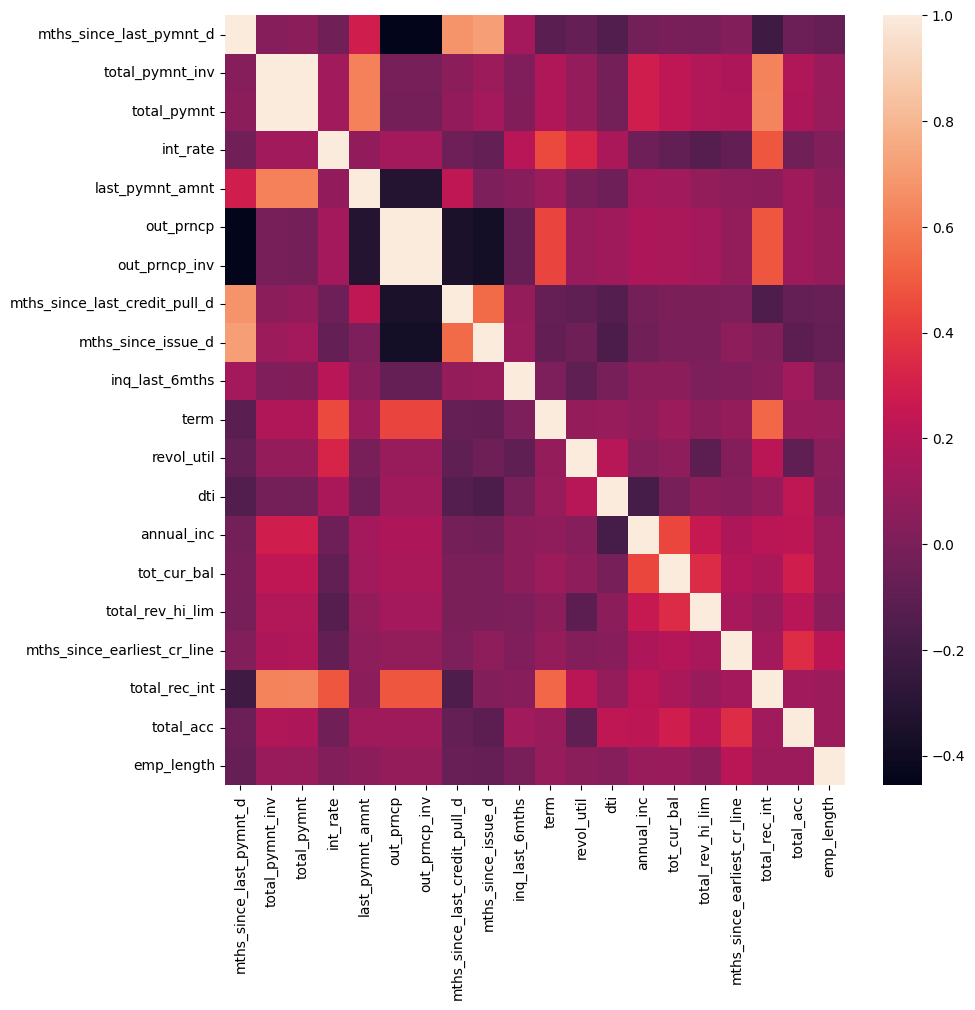

In [58]:
top_num_features = ANOVA_F_table.iloc[:20,0].to_list()
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [21]:
# Define a helper function to drop the 4 categorical features with least p-values for chi squared test, 14 numerical features with least F-Statistic
# and 2 numerical features with high multicollinearity
drop_columns_list = ANOVA_F_table.iloc[20:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())
drop_columns_list.extend(['out_prncp_inv', 'total_pymnt_inv'])

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)

#  Binning , Weight of Evidence (WoE) , Infomation value (IV)

In [59]:
filled_data = loan_data
preprocess_data = loan_data
missing = preprocess_data.isnull().sum()
missing[missing>0]

annual_inc                            4
delinq_2yrs                          29
inq_last_6mths                       29
mths_since_last_delinq           250351
open_acc                             29
pub_rec                              29
revol_util                          340
total_acc                            29
collections_12_mths_ex_med          145
mths_since_last_major_derog      367311
acc_now_delinq                       29
tot_coll_amt                      70276
tot_cur_bal                       70276
total_rev_hi_lim                  70276
mths_since_earliest_cr_line          29
mths_since_last_pymnt_d             376
mths_since_last_credit_pull_d        42
dtype: int64

In [61]:
#function to calculate Weight of Evidence (WoE) and Information Value (IV)

def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = iv_woe(preprocess_data, target='good_bad', bins=20)

C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

Information value of loan_amnt is 0.004021
Information value of funded_amnt is 0.005335
Information value of funded_amnt_inv is 0.008519
Information value of term is 0.03886


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

Information value of int_rate is 0.330892
Information value of installment is 0.00716
Information value of grade is 0.290782
Information value of emp_length is 0.006028
Information value of home_ownership is 0.021672


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})


Information value of annual_inc is 0.055093
Information value of verification_status is 0.020831
Information value of pymnt_plan is 0.000125
Information value of purpose is 0.03698
Information value of addr_state is 0.012518
Information value of dti is 0.026295
Information value of delinq_2yrs is 4.5e-05


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

Information value of inq_last_6mths is 0.036971
Information value of mths_since_last_delinq is 0.002216
Information value of open_acc is 0.000743


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

Information value of pub_rec is 0.00058
Information value of revol_bal is 0.006575
Information value of revol_util is 0.027688


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

Information value of total_acc is 0.007425
Information value of initial_list_status is 0.024801
Information value of out_prncp is 0.76565
Information value of out_prncp_inv is 0.765591


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})


Information value of total_pymnt is 0.641949
Information value of total_pymnt_inv is 0.647435
Information value of total_rec_int is 0.025457


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

Information value of last_pymnt_amnt is 1.549867
Information value of collections_12_mths_ex_med is 0.000414
Information value of mths_since_last_major_derog is 0.00396
Information value of policy_code is 0.0
Information value of application_type is 0.0
Information value of acc_now_delinq is 5.2e-05
Information value of tot_coll_amt is 0.000664


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

Information value of tot_cur_bal is 0.036247
Information value of total_rev_hi_lim is 0.034529
Information value of mths_since_earliest_cr_line is 0.008768
Information value of mths_since_issue_d is 0.089066
Information value of mths_since_last_pymnt_d is 0.436112
Information value of mths_since_last_credit_pull_d is 0.154268


C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
C:\Users\home\AppData\Local\Temp\ipykernel_56928\494736651.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

In [63]:
display(iv)
display(woe)

,Variable,IV
0,loan_amnt,0.004021
0,funded_amnt,0.005335
0,funded_amnt_inv,0.008519
0,term,0.038860
0,int_rate,0.330892
0,installment,0.007160
0,grade,0.290782
0,emp_length,0.006028
0,home_ownership,0.021672
0,annual_inc,0.055093


,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,loan_amnt,"(499.999, 3500.0]",24563,22009,0.052993,2554,0.050110,0.055947,0.000161
1,loan_amnt,"(3500.0, 5000.0]",32485,28955,0.069718,3530,0.069259,0.006601,0.000003
2,loan_amnt,"(5000.0, 6000.0]",23344,21116,0.050843,2228,0.043714,0.151083,0.001077
3,loan_amnt,"(6000.0, 7000.0]",17688,15891,0.038262,1797,0.035257,0.081790,0.000246
4,loan_amnt,"(7000.0, 8000.0]",27246,24333,0.058589,2913,0.057154,0.024806,0.000036
...,...,...,...,...,...,...,...,...,...
2,mths_since_last_pymnt_d,"(79.0, 91.0]",27194,20730,0.049914,6464,0.127767,-0.939915,0.073176
3,mths_since_last_pymnt_d,"(91.0, 163.0]",21156,16074,0.038703,5082,0.100451,-0.953750,0.058892
0,mths_since_last_credit_pull_d,"(54.999, 67.0]",412723,374142,0.900937,38581,0.757054,0.174000,0.025036
1,mths_since_last_credit_pull_d,"(67.0, 79.0]",31403,23996,0.057783,7407,0.145344,-0.922413,0.080767


In [64]:
preprocess_data.drop(columns=[
'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 
                              'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'
],axis=1 , inplace=True)

In [66]:
data_dummies1 = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['addr_state'], prefix='addr_state', prefix_sep=':'),
                 pd.get_dummies(preprocess_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
                ]
display(data_dummies1)

[        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
 0         False     True    False    False    False    False    False
 1         False    False     True    False    False    False    False
 2         False    False     True    False    False    False    False
 3         False    False     True    False    False    False    False
 4         False     True    False    False    False    False    False
 ...         ...      ...      ...      ...      ...      ...      ...
 466280    False    False     True    False    False    False    False
 466281    False    False    False     True    False    False    False
 466282    False    False    False     True    False    False    False
 466283     True    False    False    False    False    False    False
 466284    False    False    False     True    False    False    False
 
 [466285 rows x 7 columns],
         home_ownership:ANY  home_ownership:MORTGAGE  home_ownership:NONE  \
 0                    False              

In [67]:
categorical_dummies = pd.concat(data_dummies1,axis=1)
preprocess_data = pd.concat([preprocess_data,categorical_dummies],axis=1)

In [68]:
# function to calculate WoE of cat features

def woe_categorical(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [69]:
# function to plot WoE
import numpy as np

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 12))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [70]:
#seperating data into target and features
X= preprocess_data.drop(columns='good_bad', axis=1)
y=preprocess_data['good_bad']


In [71]:
# function to calculate WoE for continous variables
def woe_continous(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

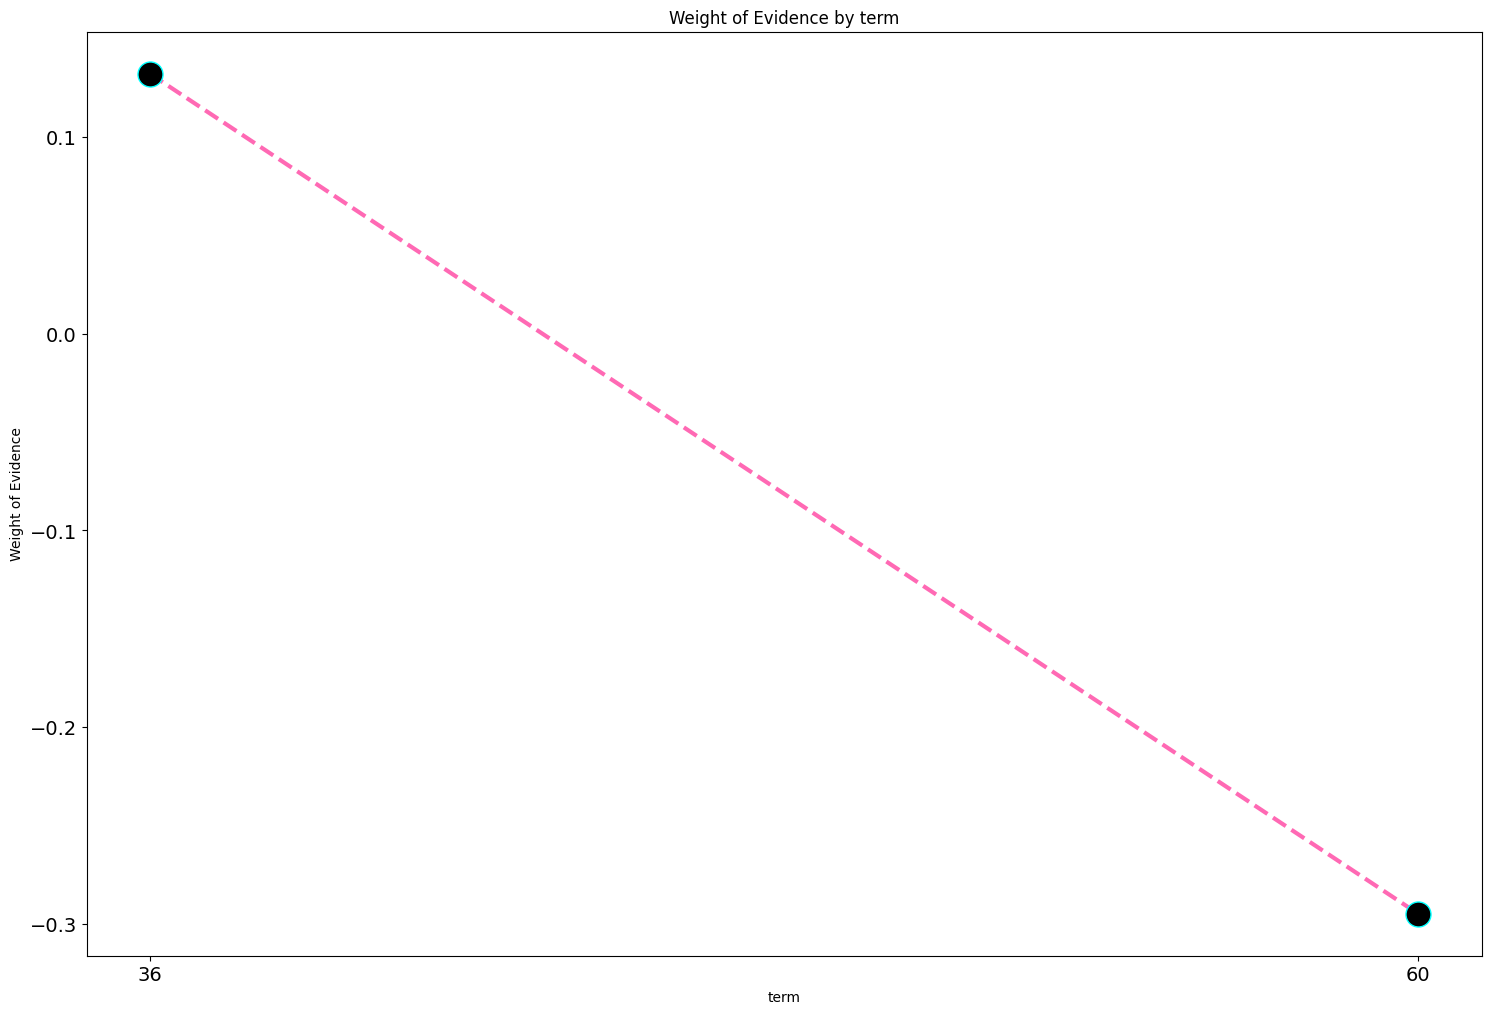

In [74]:
plot_by_woe(woe_continous(X,'term', y ))

C:\Users\home\AppData\Local\Temp\ipykernel_56928\1719959547.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
C:\Users\home\AppData\Local\Temp\ipykernel_56928\1719959547.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


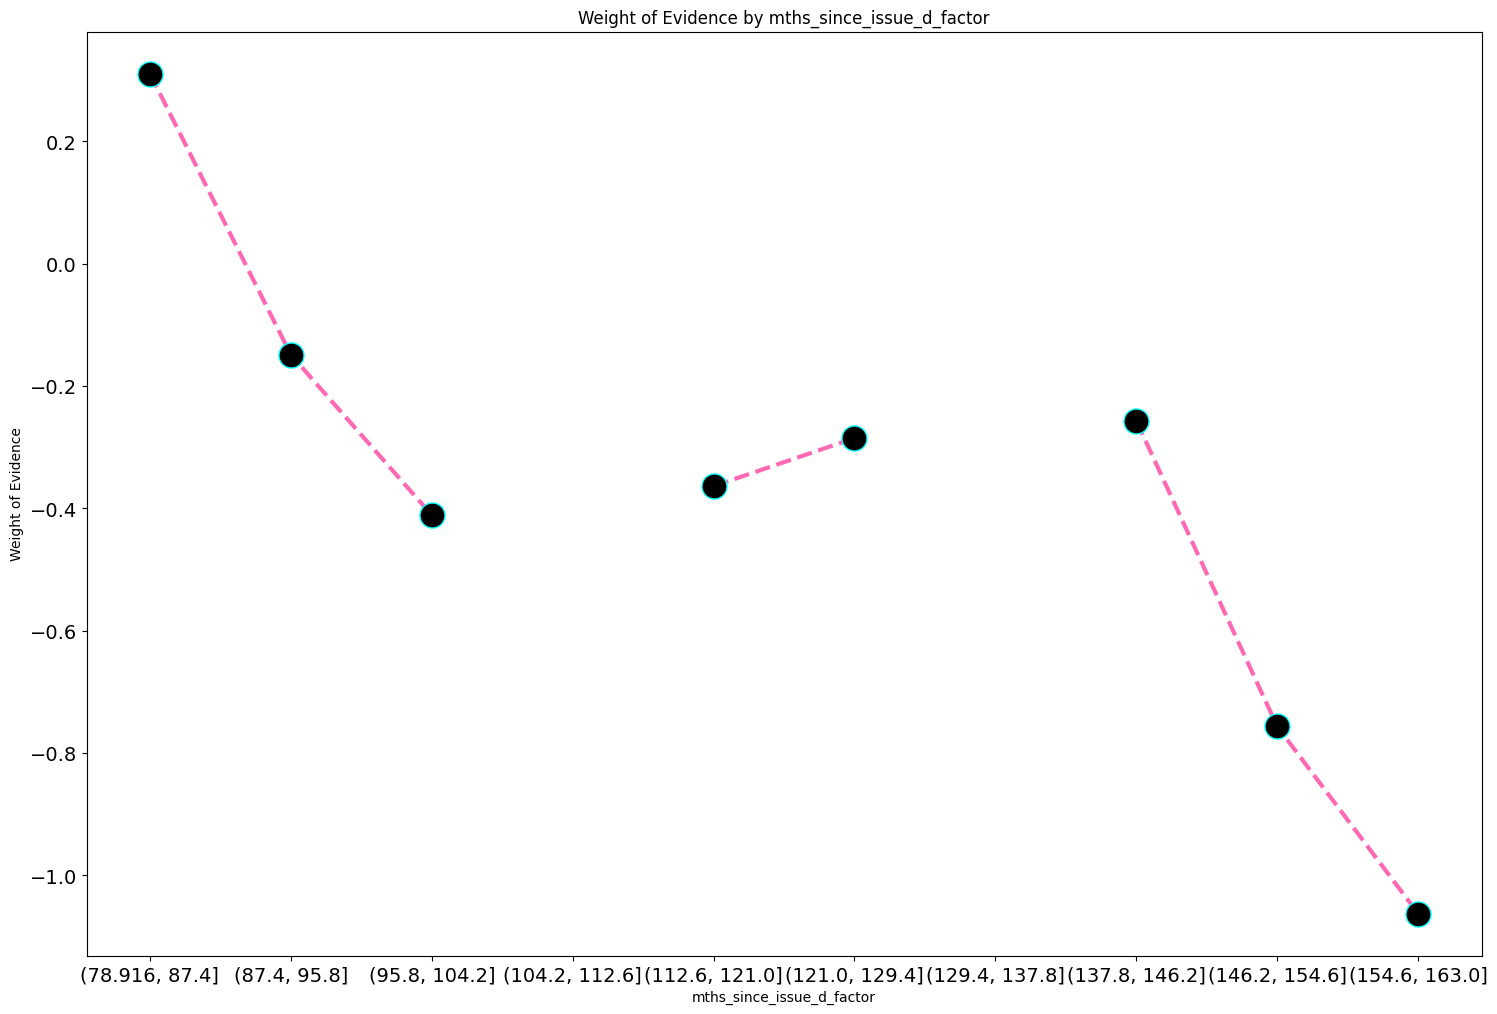

In [75]:
X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)
mths_since_iss_df = woe_continous(X, 'mths_since_issue_d_factor', y)
plot_by_woe(mths_since_iss_df)


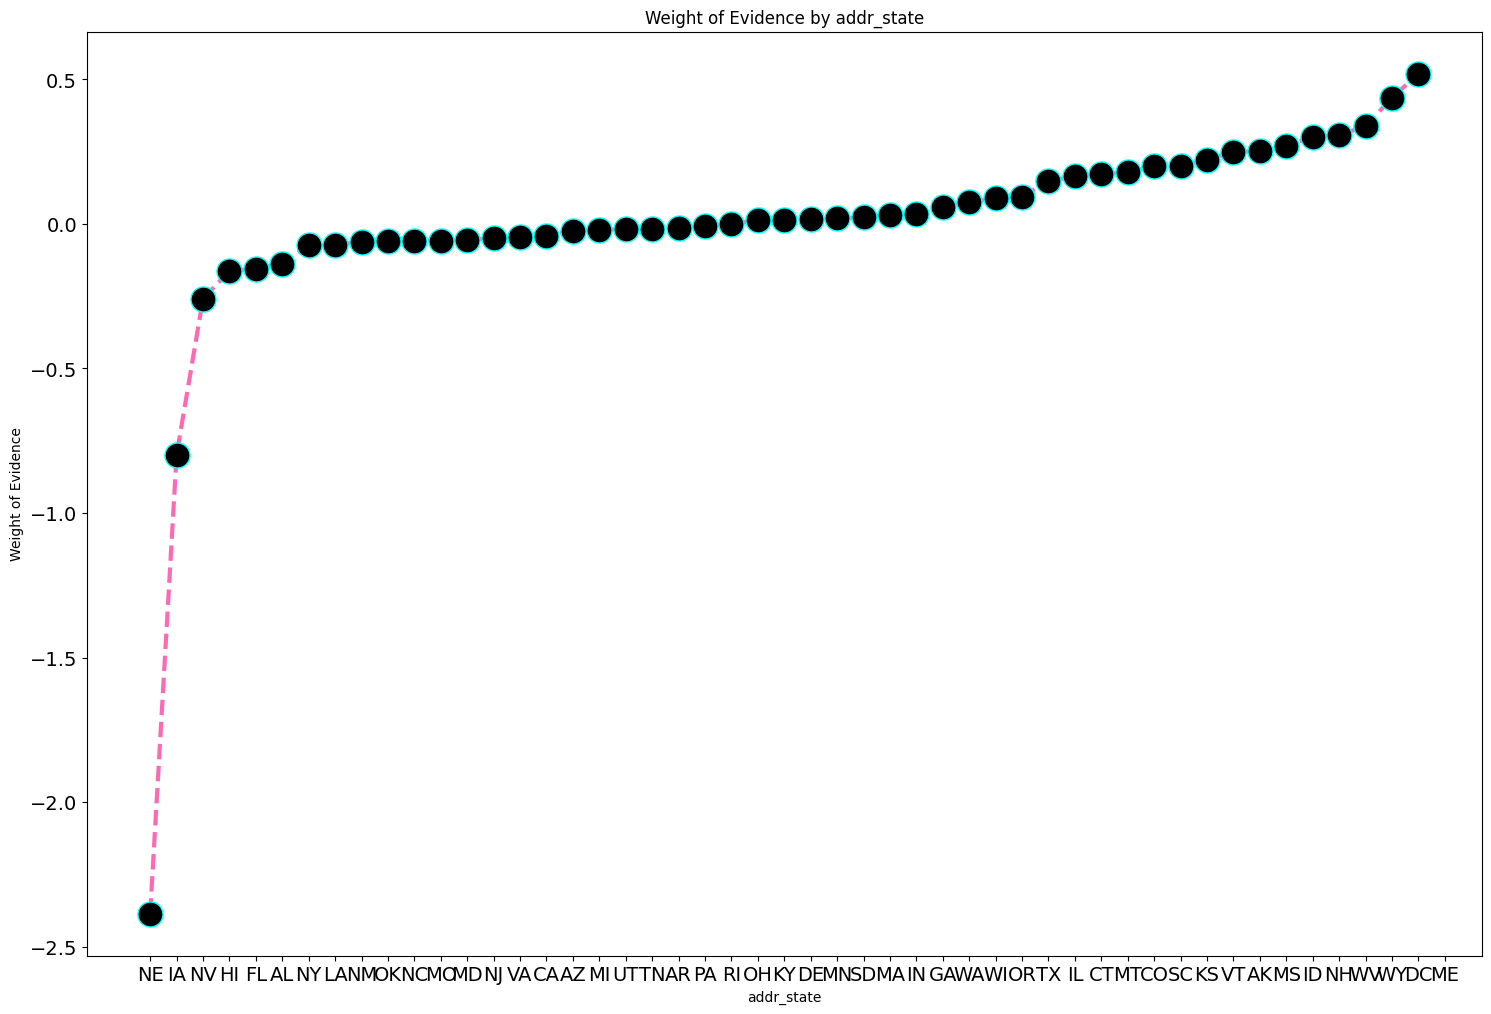

In [77]:
addr_df = woe_categorical(X, 'addr_state', y)
plot_by_woe(addr_df)

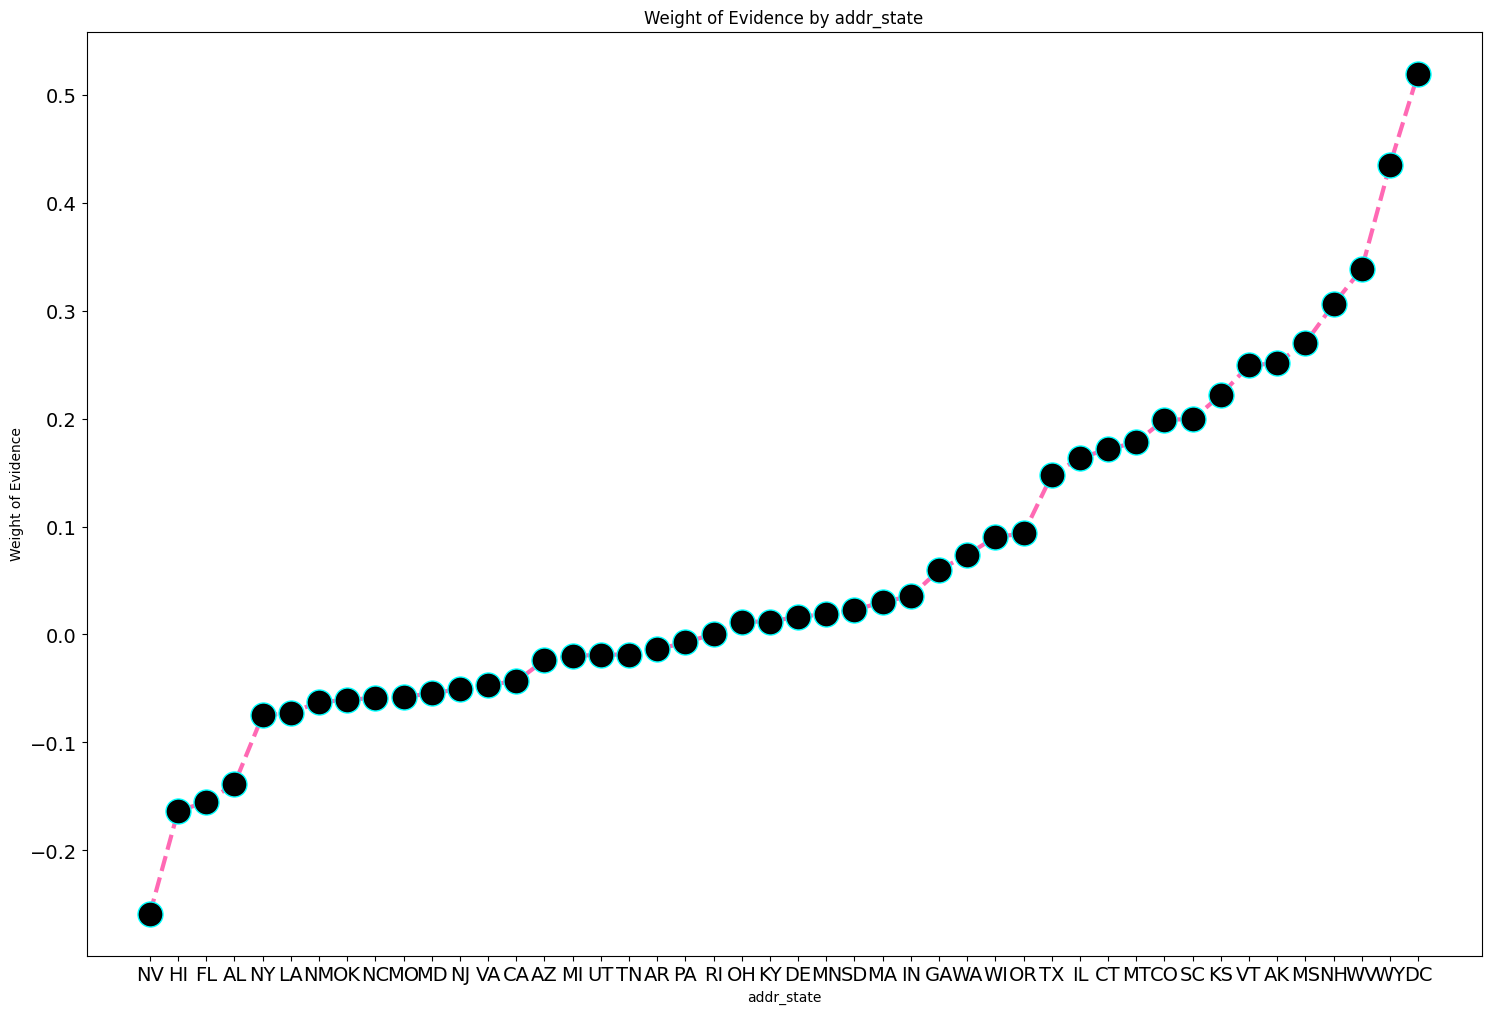

In [78]:
data1 =addr_df.iloc[2:44, :]
data2 =addr_df.iloc[45:49, :]
low_data_woe = pd.concat([data1, data2], axis=0)
plot_by_woe(low_data_woe)

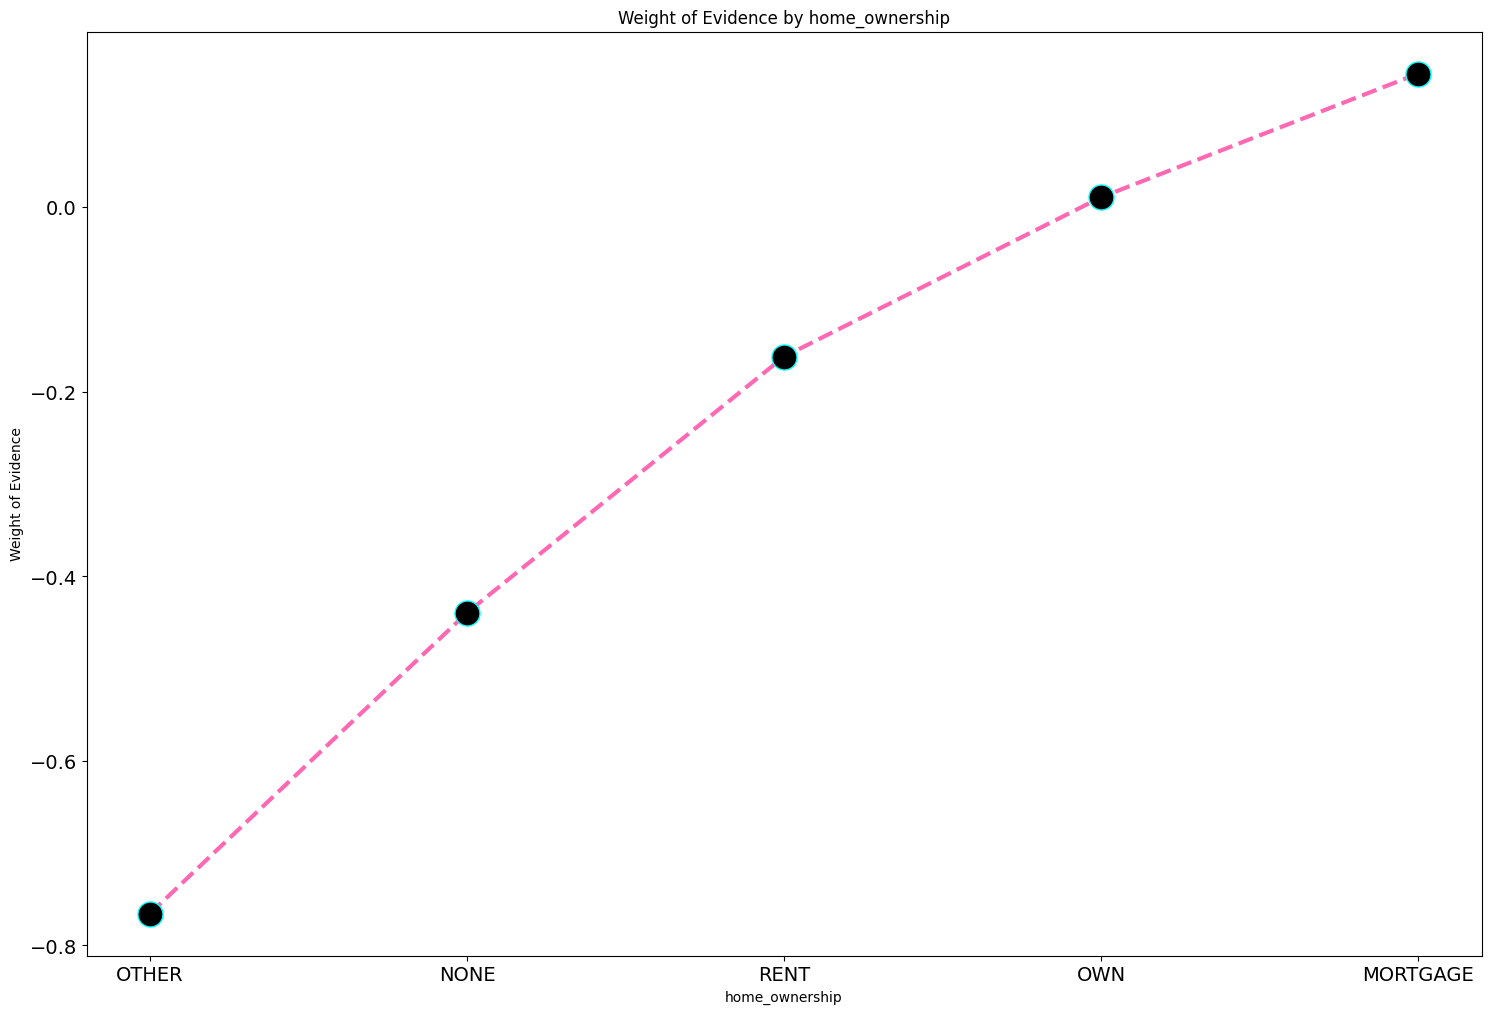

In [79]:
df_home = woe_categorical(X, 'home_ownership', y)
plot_by_woe(df_home)

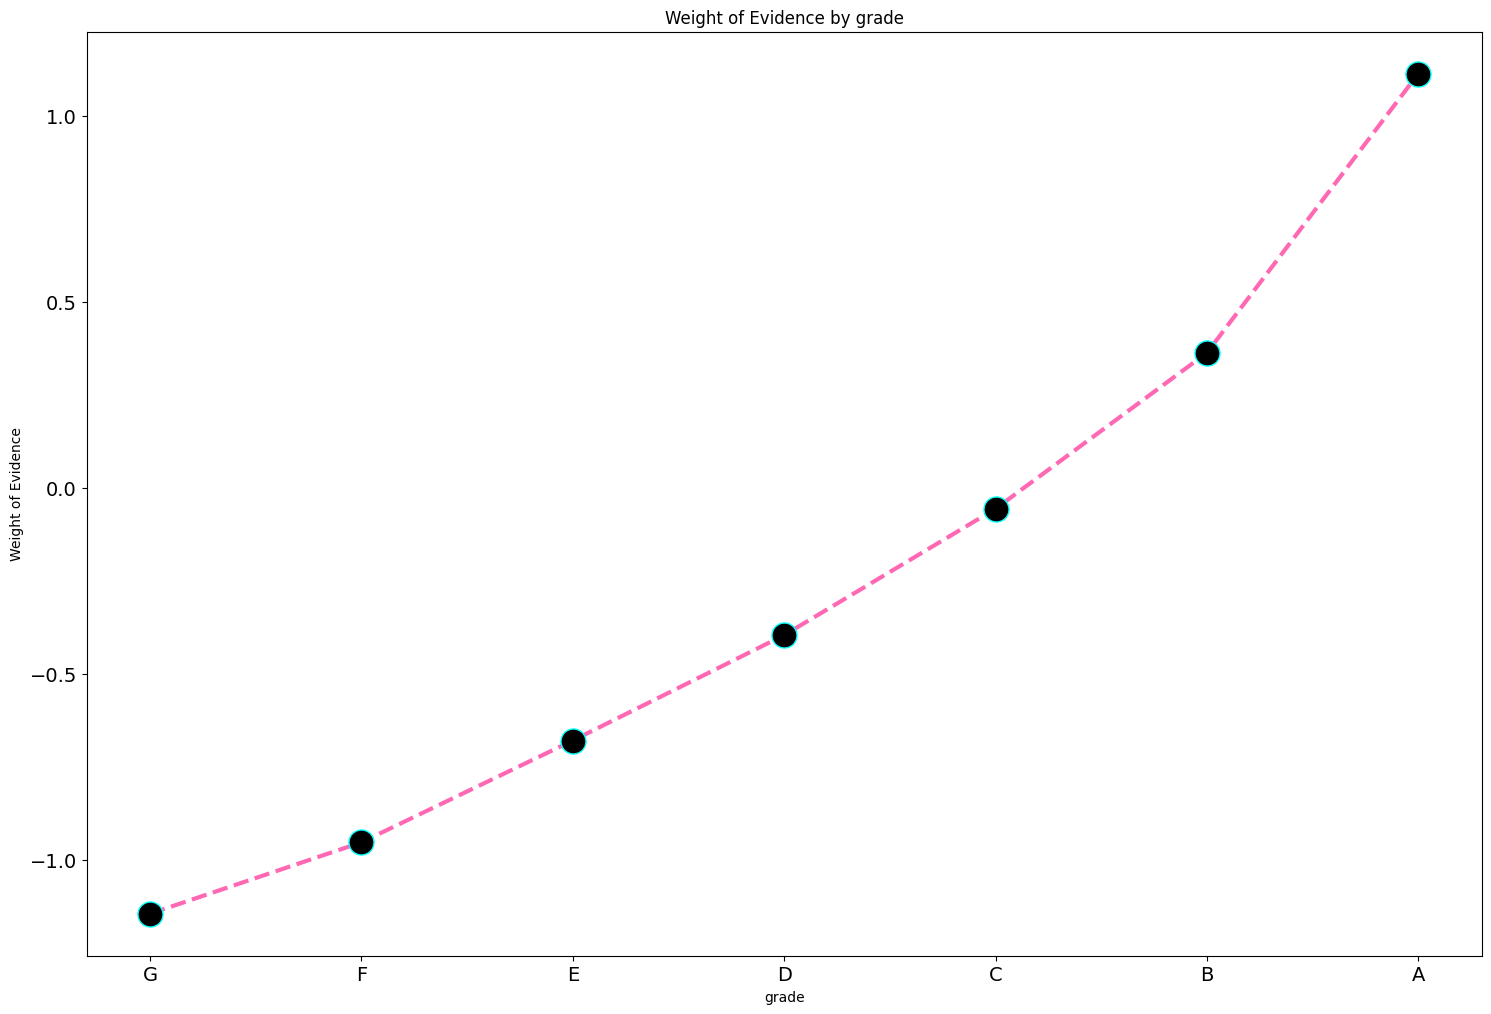

In [80]:
df_grade = woe_categorical(X, 'grade', y)
plot_by_woe(df_grade)

# Create Feature with WOE

In [72]:
# grade

new_df = preprocess_data.loc[:, 'grade:A':'grade:G']

# home_ownership 

new_df['home_ownership:OWN'] = preprocess_data.loc[:, 'home_ownership:OWN']
new_df['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_data['home_ownership:OTHER'], 
                                                    preprocess_data['home_ownership:NONE'],
                                                    preprocess_data['home_ownership:RENT'], 
                                                    preprocess_data['home_ownership:ANY']])
new_df['home_ownership:MORTGAGE'] = preprocess_data.loc[:, 'home_ownership:MORTGAGE']

#verification status
new_df['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
new_df['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
new_df['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

# purpose of loan
new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_data['purpose:small_business'],  preprocess_data['purpose:renewable_energy'], preprocess_data['purpose:moving']])
new_df['purpose:OTHER_HOUSE_MEDICAL'] =sum([preprocess_data['purpose:other'], preprocess_data['purpose:house'], preprocess_data['purpose:medical']])
new_df ['purpose:WEDDING_VACATION'] = sum([preprocess_data['purpose:wedding'], preprocess_data['purpose:vacation']])
new_df ['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_data['purpose:home_improvement'], preprocess_data['purpose:major_purchase']])
new_df ['purpose:CAR_CREDIT_CARD'] = sum([preprocess_data['purpose:car'], preprocess_data['purpose:credit_card']])


# addr state
new_df['addr_state:NE_IA_NV_HI_FL_AL'] =sum([preprocess_data['addr_state:IA'],preprocess_data['addr_state:NV'],
                                             preprocess_data['addr_state:HI'],preprocess_data['addr_state:FL'],
                                             preprocess_data['addr_state:AL']])
new_df['addr_state:NY'] = preprocess_data.loc[:, 'addr_state:NY']
new_df['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([preprocess_data['addr_state:LA'],preprocess_data['addr_state:NM'],preprocess_data['addr_state:OK'],
                                                    preprocess_data['addr_state:NC'],preprocess_data['addr_state:MO'],preprocess_data['addr_state:MD'], preprocess_data['addr_state:NJ'],
                                                    preprocess_data['addr_state:VA']])
new_df['addr_state:CA'] = preprocess_data.loc[:,'addr_state:CA']
new_df['addr_state:AZ_MI_UT_TN_AR_PA'] =sum([preprocess_data['addr_state:AZ'],preprocess_data['addr_state:MI'],preprocess_data['addr_state:UT'],
preprocess_data['addr_state:TN'],preprocess_data['addr_state:AR'],preprocess_data['addr_state:PA']])

new_df['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] =sum([preprocess_data['addr_state:RI'],preprocess_data['addr_state:OH'],preprocess_data['addr_state:KY'],
                                                   preprocess_data['addr_state:DE'],preprocess_data['addr_state:MN'],preprocess_data['addr_state:SD'],preprocess_data['addr_state:MA'],
                                                   preprocess_data['addr_state:IN']])

new_df['addr_state:GA_WA'] = sum([preprocess_data['addr_state:GA'], preprocess_data['addr_state:WA']])
new_df['addr_state:WI_OR'] = sum([preprocess_data['addr_state:WI'], preprocess_data['addr_state:OR']])
new_df['addr_state:TX'] = preprocess_data.loc[:,'addr_state:TX']
new_df['addr_state:IL_CT_MT'] =sum([preprocess_data['addr_state:IL'],preprocess_data['addr_state:CT'],preprocess_data['addr_state:MT']])
new_df['addr_state:CO_SC'] = sum([preprocess_data['addr_state:CO'], preprocess_data['addr_state:SC']])
new_df['addr_state:KS_VT_AK_NS'] =sum([preprocess_data['addr_state:KS'],preprocess_data['addr_state:VT'],preprocess_data['addr_state:AK'],
                                           preprocess_data['addr_state:MS']])
new_df['addr_state:NH_WV_WY_DC'] =sum([preprocess_data['addr_state:NH'],preprocess_data['addr_state:WV'],preprocess_data['addr_state:WY'],
                                           preprocess_data['addr_state:DC']])
#initial_list_status
new_df['initial_list_status:F'] = preprocess_data.loc[:, 'initial_list_status:f']
new_df['initial_list_status:W'] = preprocess_data.loc[:, 'initial_list_status:w']

# term 
new_df['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
new_df['term:60'] = np.where((preprocess_data['term']==60), 1,0)

#total_rec_int 
new_df['total_rec_int:<1000'] = np.where((preprocess_data['total_rec_int']<=1000), 1,0)
new_df['total_rec_int:1000-2000'] = np.where((preprocess_data['total_rec_int']>1000) &(preprocess_data['total_rec_int']<=2000), 1,0)
new_df['total_rec_int:2000-9000'] = np.where((preprocess_data['total_rec_int']>2000) &(preprocess_data['total_rec_int']<=9000), 1,0)
new_df['total_rec_int:>9000'] = np.where((preprocess_data['total_rec_int']>9000), 1,0)


#total_revol_hi_lim
new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_data['total_rev_hi_lim']<=10000),1,0)
new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_data['total_rev_hi_lim']>10000)&(preprocess_data['total_rev_hi_lim']<=20000),1,0)
new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_data['total_rev_hi_lim']>20000)&(preprocess_data['total_rev_hi_lim']<=40000),1,0)
new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_data['total_rev_hi_lim']>40000)&(preprocess_data['total_rev_hi_lim']<=60000),1,0)
new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_data['total_rev_hi_lim']>60000)&(preprocess_data['total_rev_hi_lim']<=80000),1,0)
new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_data['total_rev_hi_lim']>80000)&(preprocess_data['total_rev_hi_lim']<=100000),1,0)
new_df['total_rev_hi_lim:<100000'] =np.where((preprocess_data['total_rev_hi_lim']>100000),1,0)


#total_pymnt
new_df['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
new_df['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt']>5000)&(preprocess_data['total_pymnt']<=11000),1,0)
new_df['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt']>11000)&(preprocess_data['total_pymnt']<=16000),1,0)
new_df['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt']>16000)&(preprocess_data['total_pymnt']<=22000),1,0)
new_df['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
#int_Rate

new_df['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
new_df['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
new_df['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
new_df['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
new_df['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
new_df['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
new_df['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
new_df['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)


#dti 
new_df['dti:<4'] = np.where((preprocess_data['dti'] <=4), 1, 0)
new_df['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
new_df['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
new_df['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
new_df['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
new_df['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
new_df['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
new_df['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

#annual income 
new_df['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000),1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
new_df['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
new_df['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
new_df['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
new_df['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
new_df['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
new_df['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
new_df['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

#inq_last_6mths
new_df['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <=1), 1, 0)
new_df['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] >1)& (preprocess_data['inq_last_6mths']<=2),  1, 0)
new_df['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] >2)& (preprocess_data['inq_last_6mths']<=4),  1, 0)
new_df['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] >4)& (preprocess_data['inq_last_6mths']<=7),  1, 0)

#tot_cur_balance
new_df['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
new_df['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

#mths_since_last_credit_pull_d
new_df['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_data['mths_since_last_credit_pull_d']<=65), 1,0)
new_df['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>65)&(preprocess_data['mths_since_last_credit_pull_d']<=76),1,0)
new_df['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>76), 1,0)

#mths_since_issue_d_factor
new_df['mths_since_issue_d_:<70.8'] = np.where((preprocess_data['mths_since_issue_d']<=70.8), 1,0)
new_df['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_data['mths_since_issue_d'] >70.8) & (preprocess_data['mths_since_issue_d']<=73.6), 1,0)
new_df['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_data['mths_since_issue_d']>70.8) & (preprocess_data['mths_since_issue_d']<=76.4), 1,0)
new_df['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_data['mths_since_issue_d'] >76.4) & (preprocess_data['mths_since_issue_d']<=79.2), 1,0)
new_df['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_data['mths_since_issue_d'] >79.2) & (preprocess_data['mths_since_issue_d']<=82), 1,0)
new_df['mths_since_issue_d_>82-84'] = np.where((preprocess_data['mths_since_issue_d'] >82) & (preprocess_data['mths_since_issue_d']<=84), 1,0)
new_df['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_data['mths_since_issue_d'] >84) & (preprocess_data['mths_since_issue_d']<=90.4), 1,0)
new_df['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_data['mths_since_issue_d'] >90.4) & (preprocess_data['mths_since_issue_d']<=96), 1,0)

new_df['out_prncp:<3000'] = np.where((preprocess_data['out_prncp']<=3000), 1,0)
new_df['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp']>3000)&(preprocess_data['out_prncp']<=6000), 1,0)
new_df['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp']>6000)&(preprocess_data['out_prncp']<=10000), 1,0)
new_df['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp']>10000)&(preprocess_data['out_prncp']<=12000), 1,0)
new_df['out_prncp:>12000'] = np.where((preprocess_data['out_prncp']>12000), 1,0)

new_df['bad_loan'] = preprocess_data.loc[:, 'good_bad']

C:\Users\home\AppData\Local\Temp\ipykernel_56928\2986184152.py:156: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df['bad_loan'] = preprocess_data.loc[:, 'good_bad']


In [73]:
new_df.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:OTHER_NONE_RENT_ANY,home_ownership:MORTGAGE,...,mths_since_issue_d_:>79.2-82,mths_since_issue_d_>82-84,mths_since_issue_d_:>84-90.4,mths_since_issue_d_:>90.4-96,out_prncp:<3000,out_prncp:3000-6000,out_prncp:6000-10000,out_prncp:10000-12000,out_prncp:>12000,bad_loan
0,False,True,False,False,False,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,1
1,False,False,True,False,False,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,0
2,False,False,True,False,False,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,1
3,False,False,True,False,False,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,1
4,False,True,False,False,False,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,1
5,True,False,False,False,False,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,1
6,False,False,True,False,False,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,1
7,False,False,False,False,True,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,1
8,False,False,False,False,False,True,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
9,False,True,False,False,False,False,False,False,1,False,...,0,0,0,0,1,0,0,0,0,0


In [83]:
new_df1 = new_df
#dummy categories to drop
ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                 'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                 'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000']
#col dropped
new_df.drop(columns=ref_categories, inplace=True, axis=1)

KeyError: "['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000', 'total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING', 'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96', 'int_rate:21.932-26.06', 'dti:27-40', 'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000'] not found in axis"

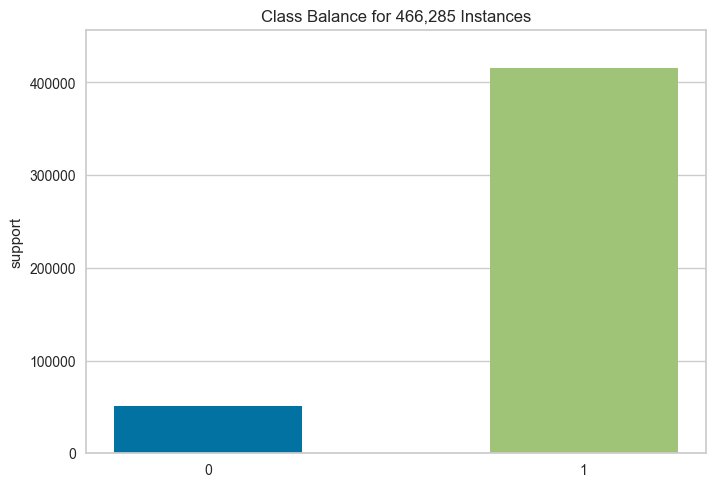

<Axes: title={'center': 'Class Balance for 466,285 Instances'}, ylabel='support'>

In [84]:
from yellowbrick.target import ClassBalance
X= new_df.drop(columns='bad_loan', axis=1)
y = new_df['bad_loan']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

In [85]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#checking  imbalance for training dataset
y_train.value_counts()

bad_loan
1    332169
0     40859
Name: count, dtype: int64

In [87]:
#import libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [88]:
#dealing with imbalanced data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)
#check value counts after oversampling
y_train_series.value_counts()

c:\Users\home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


bad_loan
1    332169
0    332169
Name: count, dtype: int64

# Logistic Regression Model

In [89]:
#building logistic regression model
model = LogisticRegression()
model.fit(X_train_o, y_train_o)

LogisticRegression()

In [90]:
#predicting
y_preds = model.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.31      0.80      0.45     10109
           1       0.97      0.79      0.87     83148

    accuracy                           0.79     93257
   macro avg       0.64      0.79      0.66     93257
weighted avg       0.90      0.79      0.82     93257



In [91]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
246786,1,0.464067,0
159258,1,0.701895,1
81309,1,0.151140,0
11478,1,0.154575,0
196849,1,0.815764,1


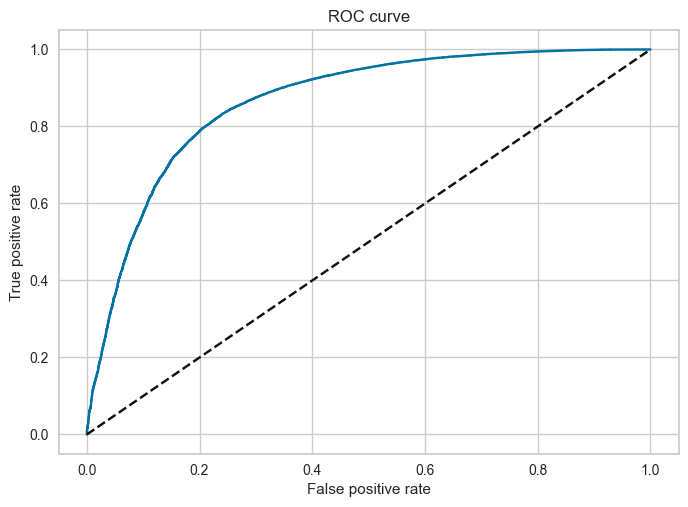

In [92]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [93]:

#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.8651498166069127

In [94]:

Gini = AUROC * 2 - 1
Gini

0.7302996332138254

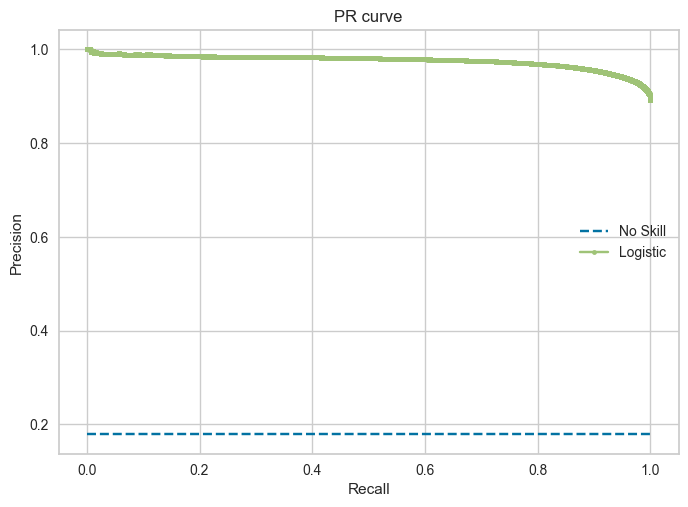

In [95]:
from sklearn.metrics import precision_recall_curve, auc

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [96]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9759919392192971

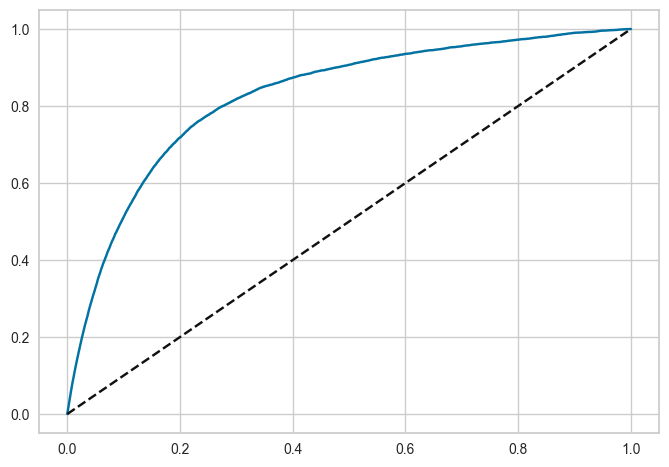

In [97]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

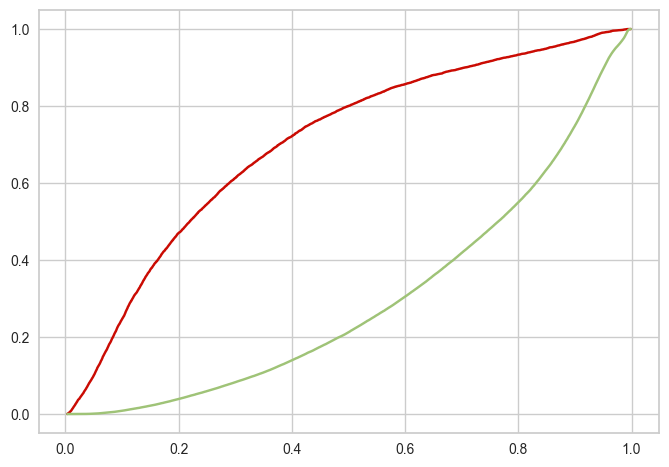

In [98]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [99]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.5923458416884667


In [102]:
X_train_o

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,verification_status:NOT_VERIFIED,verification_status:SOURCE_VERIFIED,...,mths_since_issue_d_:>70.8-73.6,mths_since_issue_d_:73.6-76.4,mths_since_issue_d_:>76.4-79.2,mths_since_issue_d_:>79.2-82,mths_since_issue_d_>82-84,mths_since_issue_d_:>84-90.4,out_prncp:<3000,out_prncp:3000-6000,out_prncp:6000-10000,out_prncp:10000-12000
0,False,False,True,False,False,False,False,True,False,False,...,0,0,0,0,0,0,1,0,0,0
1,False,False,True,False,False,False,True,False,False,False,...,0,0,0,0,0,0,1,0,0,0
2,False,True,False,False,False,False,False,True,False,True,...,0,0,0,0,0,0,1,0,0,0
3,False,False,True,False,False,False,False,False,False,True,...,0,0,1,0,0,0,0,0,0,0
4,False,False,True,False,False,False,False,False,False,True,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664333,False,False,False,False,False,True,False,True,False,False,...,0,0,1,0,0,0,0,0,1,0
664334,False,False,True,False,False,False,False,False,False,True,...,0,0,1,0,0,0,1,0,0,0
664335,False,True,False,False,False,False,False,True,False,True,...,0,0,0,0,0,0,1,0,0,0
664336,False,False,True,False,False,False,False,False,True,False,...,0,0,1,0,0,0,1,0,0,0


# Score From Logistic Regression

In [106]:
feature_name = X_train_o.columns
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(model.coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table


,Feature name,Coefficients
0,Intercept,4.786357
1,grade:A,0.657550
2,grade:B,0.790482
3,grade:C,0.756424
4,grade:D,0.732986
...,...,...
84,mths_since_issue_d_:>84-90.4,0.000000
85,out_prncp:<3000,-2.123878
86,out_prncp:3000-6000,-0.154786
87,out_prncp:6000-10000,0.247499


In [117]:
summary_table['Coefficients'][0]
summary_table['Coefficients'].iloc[1:]

1     0.657550
2     0.790482
3     0.756424
4     0.732986
5     0.539403
        ...   
84    0.000000
85   -2.123878
86   -0.154786
87    0.247499
88    0.166953
Name: Coefficients, Length: 88, dtype: float64

In [120]:
import numpy as np
import pandas as pd

# กำหนดค่าพารามิเตอร์หลัก
BASE_SCORE = 600
BASE_ODDS = 1/50  # 1 Default ต่อ 50 Non-Default = 0.02
PDO = 20

# 1. คำนวณ Factor และ Offset
Factor = PDO / np.log(2)
Offset = BASE_SCORE - (Factor * np.log(BASE_ODDS))
num_variables = len(summary_table['Coefficients'])

print(f"\n--- Scorecard Parameters ---")
print(f"Factor: {Factor:.2f}")
print(f"Offset: {Offset:.2f}")
print(f"Variables Count (n): {num_variables - 1}")

# 2. คำนวณคะแนนพื้นฐานสำหรับแต่ละตัวแปร (Base Score per Variable)
# ค่านี้จะถูกแจกจ่ายไปยังทุกตัวแปรในโมเดล
Base_Score_Per_Var = (summary_table['Coefficients'][0] / (num_variables - 1)) * Factor
print(f"Base Score Per Variable (Intercept * Factor / n): {Base_Score_Per_Var:.2f}")

# 3. จัดเก็บค่าสัมประสิทธิ์ใน DataFrame เพื่อคำนวณคะแนน
scorecard_params = pd.DataFrame(list(summary_table['Coefficients'].iloc[1:]), columns=['Coefficient'])
scorecard_params['Base_Score_Per_Var'] = Base_Score_Per_Var
display(scorecard_params)


--- Scorecard Parameters ---
Factor: 28.85
Offset: 712.88
Variables Count (n): 88
Base Score Per Variable (Intercept * Factor / n): 1.57


,Coefficient,Base_Score_Per_Var
0,0.657550,1.569376
1,0.790482,1.569376
2,0.756424,1.569376
3,0.732986,1.569376
4,0.539403,1.569376
...,...,...
83,0.000000,1.569376
84,-2.123878,1.569376
85,-0.154786,1.569376
86,0.247499,1.569376


# TEST MODEL EXPLAIN

In [121]:
from lime.lime_tabular import LimeTabularExplainer
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [122]:
from sklearn.model_selection import train_test_split
trained_models = [] #  keep track of all details for models we train
def train_model(model, data, labels): 
  X = data
  y = labels.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12345)
  pipe = Pipeline([('scaler', StandardScaler()),('clf', model["clf"])])
  start_time = time.time()
  pipe.fit(X_train, y_train)
  train_time = time.time() - start_time

  train_accuracy =  pipe.score(X_train, y_train)
  test_accuracy = pipe.score(X_test, y_test) 
  model_details = {"name": model["name"], "train_accuracy":train_accuracy, "test_accuracy":test_accuracy, "train_time": train_time, "model": pipe}
  return model_details

models = [
          {"name": "Extra Trees", "clf": ExtraTreesClassifier()},
          {"name": "Random Forest", "clf": RandomForestClassifier(n_estimators=100)}, 
          {"name": "Gradient Boosting", "clf": GradientBoostingClassifier(n_estimators=100)},
          {"name": "XGBoost", "clf": XGBClassifier(silent=True)},
          {"name": "CatBoost", "clf": CatBoostClassifier()}, 
          {"name": "MLP Neural Net", "clf": MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10,10,5,2), max_iter=500, random_state=42)}]

for model in models:
  model_details = train_model(model, X, y) 
  trained_models.append(model_details)

c:\Users\home\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [14:27:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Learning rate set to 0.125632
0:	learn: 0.5564736	total: 169ms	remaining: 2m 49s
1:	learn: 0.4594560	total: 202ms	remaining: 1m 40s
2:	learn: 0.3957078	total: 234ms	remaining: 1m 17s
3:	learn: 0.3523692	total: 265ms	remaining: 1m 5s
4:	learn: 0.3261104	total: 297ms	remaining: 59.2s
5:	learn: 0.3059547	total: 329ms	remaining: 54.5s
6:	learn: 0.2916797	total: 352ms	remaining: 50s
7:	learn: 0.2788233	total: 375ms	remaining: 46.6s
8:	learn: 0.2721184	total: 395ms	remaining: 43.5s
9:	learn: 0.2650359	total: 419ms	remaining: 41.5s
10:	learn: 0.2576914	total: 445ms	remaining: 40s
11:	learn: 0.2549879	total: 476ms	remaining: 39.2s
12:	learn: 0.2506348	total: 508ms	remaining: 38.6s
13:	learn: 0.2480420	total: 541ms	remaining: 38.1s
14:	learn: 0.2454112	total: 653ms	remaining: 42.9s
15:	learn: 0.2437115	total: 684ms	remaining: 42.1s
16:	learn: 0.2423512	total: 718ms	remaining: 41.5s
17:	learn: 0.2407154	total: 752ms	remaining: 41s
18:	learn: 0.2397547	total: 784ms	remaining: 40.5s
19:	learn: 0.2

In [123]:
from lime.lime_tabular import LimeTabularExplainer
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12345) 

def get_lime_explainer(model, data, labels):  

  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]
  feat_names = list(data.columns)
  class_names = list(labels.unique())
  scaler = model["model"]["scaler"]
  data = scaler.transform(data) # scale data to reflect train time scaling
  lime_explainer = LimeTabularExplainer(data,
                                      feature_names=feat_names,
                                      class_names=class_names,
                                      categorical_features=cat_feat_ix ,
                                      mode="classification"
                                      )
  return lime_explainer

def lime_explain(explainer, data, predict_method, num_features): 
  explanation = explainer.explain_instance(data, predict_method, num_features=num_features) 
  return explanation

lime_data_explainations = []
lime_metrics = []
lime_explanation_time = []
feat_names = list(X.columns)
test_data_index = 6
for current_model in trained_models:  
  scaler = current_model["model"]["scaler"]
  scaled_test_data = scaler.transform(X_test)
  predict_method = current_model["model"]["clf"].predict_proba 
  top_x = 10
  start_time = time.time()
  # explain first sample from test data
  lime_explainer = get_lime_explainer(current_model, X_train, y_train)
  explanation = lime_explain(lime_explainer, scaled_test_data[test_data_index], predict_method, top_x) 
  elapsed_time = time.time() - start_time 

  ex_holder = {}
  for feat_index,ex in explanation.as_map()[1] :
    ex_holder[feat_names[feat_index]] = ex
  
  lime_data_explainations.append(ex_holder) 
  actual_pred = predict_method(scaled_test_data[test_data_index].reshape(1,-1))
  perc_pred_diff =  abs(actual_pred[0][1] - explanation.local_pred[0])   
  lime_explanation_time.append({"time": elapsed_time, "model": current_model["name"] })
  lime_metrics.append({"lime class1": explanation.local_pred[0], "actual class1": actual_pred[0][1], "class_diff": round(perc_pred_diff,3), "model": current_model["name"] })

C:\Users\home\AppData\Local\Temp\ipykernel_56928\3458960883.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]
C:\Users\home\AppData\Local\Temp\ipykernel_56928\3458960883.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]
C:\Users\home\AppData\Local\Temp\ipykernel_56928\3458960883.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  cat_feat_ix = [i for i,c in enumerate(data.columns) if pd.api.types.is_categorical_dtype(data[c])]
C:\Users\home\AppData\Local\Temp\ipykernel_56928\345896088

In [124]:
def setup_plot():
  plt.rcParams["axes.grid.axis"] ="y"
  plt.rcParams["axes.grid"] = True
  plt.rcParams["legend.fontsize"] = 20
  plt.rc('grid', linestyle="dashed", color='lightgrey', linewidth=1)
  plt.rcParams["xtick.labelsize"] = 18
  plt.rcParams["ytick.labelsize"]  = 18

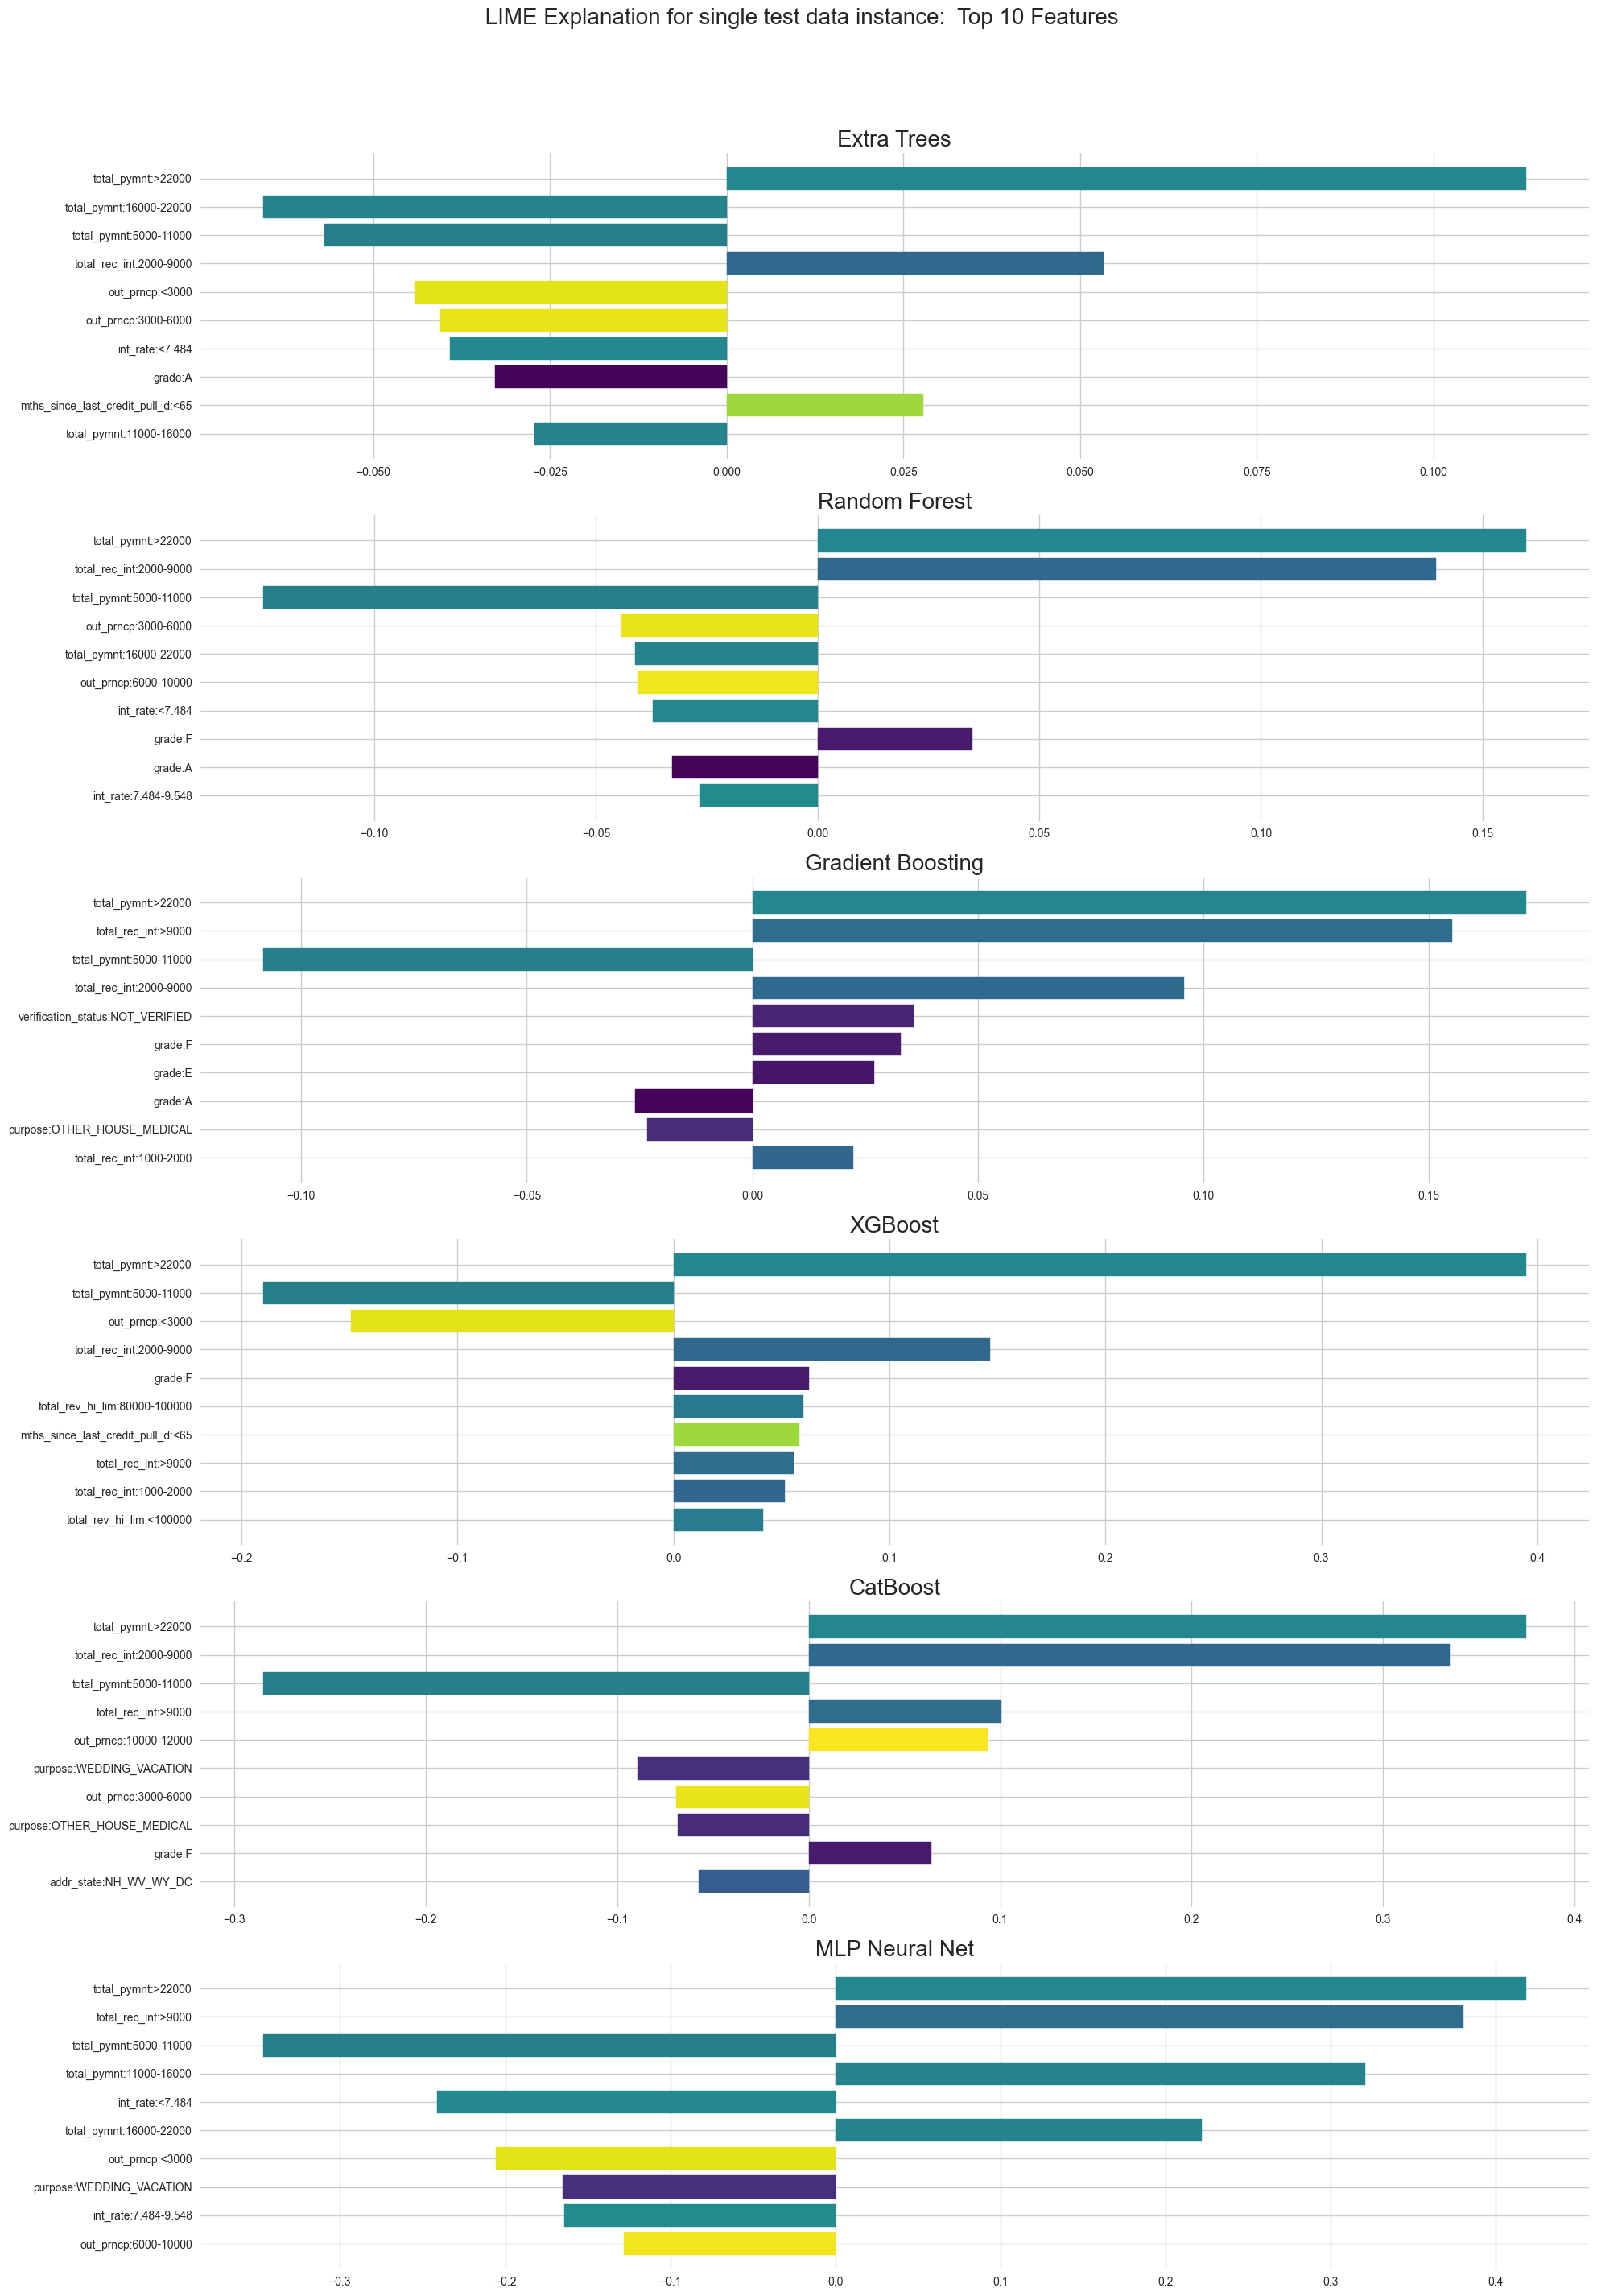

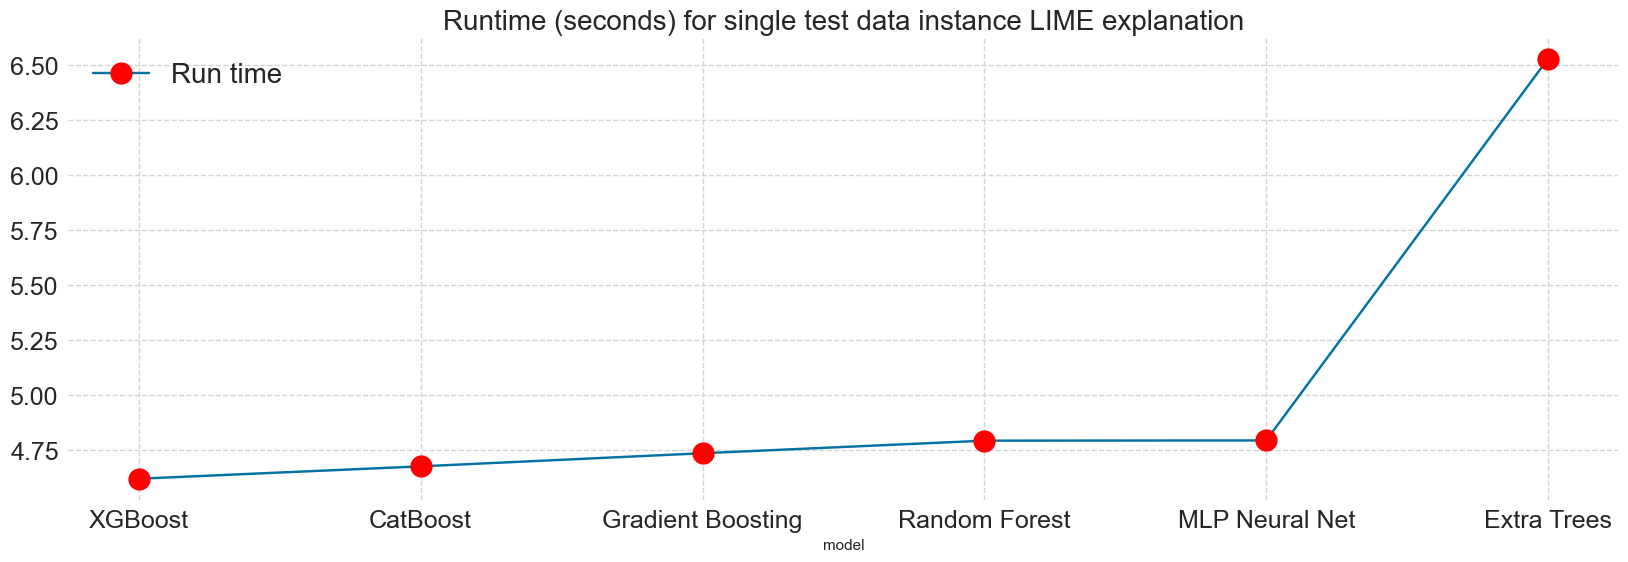

In [125]:
color_list =  sns.color_palette("viridis", len(X.columns)) 

def plot_lime_exp(fig, fig_index, exp_data, title):
  features =  list(exp_data.keys())[::-1]
  explanations = list(exp_data.values())[::-1]
  ax = fig.add_subplot(fig_index) 
  lime_bar = ax.barh( features, explanations ) 
  ax.set_title(title, fontsize = 20)
  for i,bar in enumerate(lime_bar):
    bar.set_color(color_list[list(X.columns).index(features[i])])
    plt.box(False) 
fig = plt.figure(figsize=(20,30))

# Plot lime explanations for trained models
for i, dex in enumerate(lime_data_explainations):
  fig_index = int("61" + str(i+1))
  plot_lime_exp(fig, fig_index, lime_data_explainations[i], trained_models[i]["name"])

plt.suptitle( " LIME Explanation for single test data instance:  Top " + str(top_x) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot run time for explanations
lx_df = pd.DataFrame(lime_explanation_time)
lx_df.sort_values("time", inplace=True)
setup_plot()
lx_ax = lx_df.plot(kind="line", marker="o", mfc="red", mec="white", markersize=16, x="model", title="Runtime (seconds) for single test data instance LIME explanation", figsize=(20,6))
lx_ax.title.set_size(20)
lx_ax.legend(["Run time"])
plt.box(False)

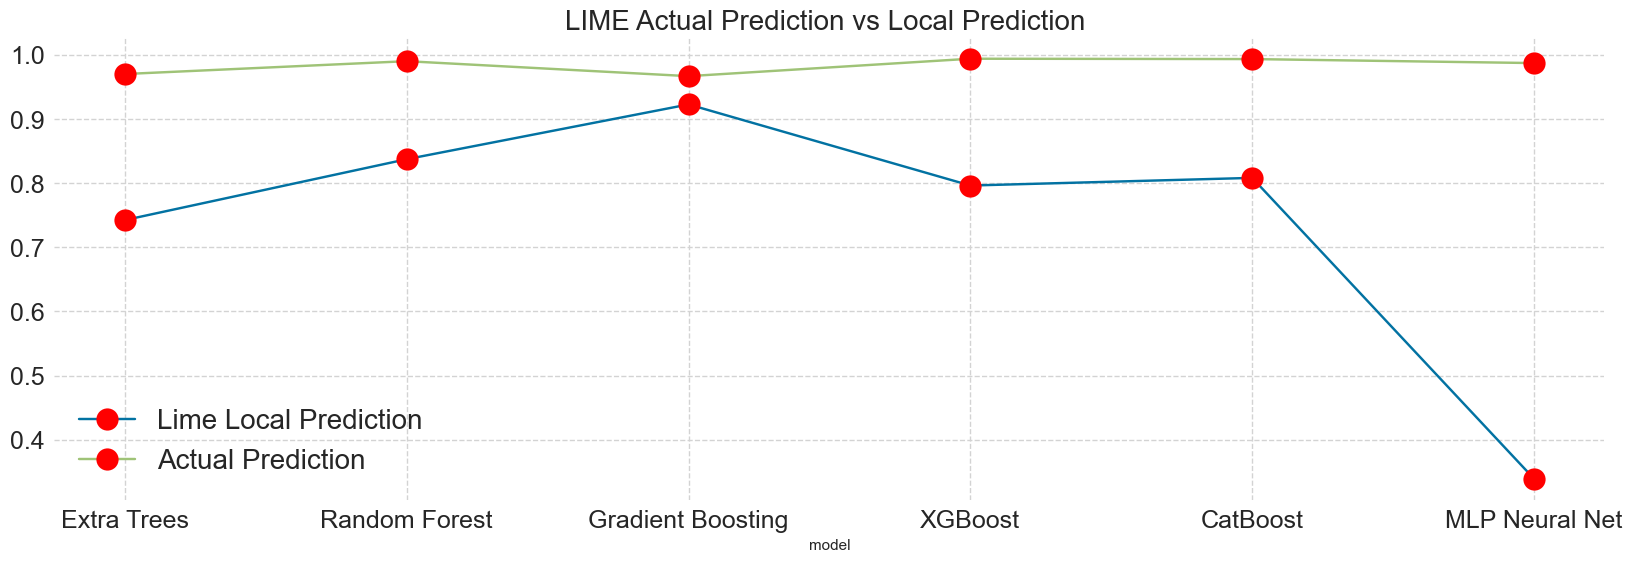

In [126]:
# Plot run time for explanations
lime_metrics_df = pd.DataFrame(lime_metrics)  
lime_metrics_df_ax = lime_metrics_df[["lime class1", "actual class1", "model"]].plot(kind="line", marker="o", mfc="red", mec="white", markersize=16, x="model", title="LIME Actual Prediction vs Local Prediction ", figsize=(20,6))
lime_metrics_df_ax.title.set_size(20)
lime_metrics_df_ax.legend(["Lime Local Prediction", "Actual Prediction"])
plt.box(False)

In [150]:
import gc
gc.collect()

15065

In [ ]:
import shap

def get_kernel_shap_explainer(model, background_data, train_data):  
  shap_explainer = shap.KernelExplainer(model.predict_proba, background_data)   
  return shap_explainer 

def shap_explain(explainer, test_data): 
  shap_values = explainer.shap_values(test_data, l1_reg="aic")
  
  return shap_values

shap_data_explainations = []
shape_explanation_time = []
feat_names = list(X.columns) 
data_subsample = 500 
for current_model in trained_models:  
  scaler = current_model["model"]["scaler"]
  scaled_test_data = scaler.transform(X_test)
  scaled_train_data = scaler.transform(X_train)
  sampled_scaled_train_data = shap.sample(scaled_train_data, data_subsample) # subsample background data to make things faster
  
  start_time = time.time()
  shap_explainer  = get_kernel_shap_explainer(current_model["model"]["clf"], sampled_scaled_train_data, scaled_train_data)

  # explain first sample from test data 
  sampled_scaled_test_data = scaled_test_data[test_data_index].reshape(1,-1)
  shap_values = shap_explain(shap_explainer, sampled_scaled_test_data) 
  elapsed_time = time.time() - start_time 
  idx = np.argsort(np.abs(shap_values[1][0]))[::-1] 
  ex_holder = { feat_names[idx[i]] : shap_values[1][0][idx[i]] for i in range(top_x)} 
   
 
  shap_data_explainations.append(ex_holder) 
  shape_explanation_time.append({"time": elapsed_time, "model": current_model["name"] })
  

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

MemoryError: Unable to allocate 16.9 MiB for an array with shape (1106000, 2) and data type float64

In [ ]:
def plot_shap_exp(fig, fig_index, exp_data, title):
  features =  list(exp_data.keys())[::-1]
  explanations = list(exp_data.values())[::-1]
  ax = fig.add_subplot(fig_index) 
  lime_bar = ax.barh( features, explanations ) 
  ax.set_title(title, fontsize = 20)
  for i,bar in enumerate(lime_bar):
    bar.set_color(color_list[list(current_data.columns).index(features[i])])
    plt.box(False) 


# Plot SHAP explanations for a given test set item
fig = plt.figure(figsize=(20,30))
for i, dex in enumerate(shap_data_explainations):
  fig_index = int("61" + str(i+1))
  plot_lime_exp(fig, fig_index, shap_data_explainations[i], trained_models[i]["name"])

plt.suptitle( "Kernel SHAP Explanation for single test data instance:  Top " + str(top_x) + " Features", fontsize=20, fontweight="normal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plot SHAP explanation run time
shapx_df = pd.DataFrame(shape_explanation_time)
shapx_df.sort_values("time", inplace=True)

# Plot both LIME and SHAP explanation run times
m_df =  shapx_df.merge(lx_df, on="model", suffixes=("_SHAP", "_LIME")) 
m_df.head() 
mx_df_ax = m_df.plot(kind="line", marker="o", mfc="red", mec="white", markersize=16, x="model", title="Kernel SHAP vs LIME: Runtime (seconds) for single instance explanation", figsize=(20,6))
mx_df_ax.title.set_size(20)
mx_df_ax.legend(["Run time for SHAP", "Run time for LIME"])
plt.box(False)

# Test Data (Old)

In [29]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt'],
      dtype='object')

In [22]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

# apply to our final four categorical variables
X_train = dummy_creation(X_train, ['grade', 'home_ownership', 'verification_status', 'purpose'])

In [23]:
emp_length_converter(X_test, 'emp_length')
X_test['issue_d'] = X_test['issue_d'].apply(parse_mon_yy_auto)
X_test['issue_d'] = X_test['issue_d'].dt.strftime("%d/%m/%Y")
X_test['earliest_cr_line'] = X_test['earliest_cr_line'].apply(parse_mon_yy_auto)
X_test['earliest_cr_line'] = X_test['earliest_cr_line'].dt.strftime("%d/%m/%Y")
X_test['last_pymnt_d'] = X_test['last_pymnt_d'].apply(parse_mon_yy_auto)
X_test['last_pymnt_d'] = X_test['last_pymnt_d'].dt.strftime("%d/%m/%Y")
X_test['last_credit_pull_d'] = X_test['last_credit_pull_d'].apply(parse_mon_yy_auto)
X_test['last_credit_pull_d'] = X_test['last_credit_pull_d'].dt.strftime("%d/%m/%Y")

date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')
loan_term_converter(X_test, 'term')
col_to_drop(X_test, drop_columns_list)
# X_test = dummy_creation(X_test, ['grade', 'home_ownership', 'verification_status', 'purpose'])
# reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set
# X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

In [24]:
X_test = dummy_creation(X_test, ['grade', 'home_ownership', 'verification_status', 'purpose'])
# reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

In [25]:
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

# WOEs and IVs of Feature (Old)

In [26]:
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column name), and a dataframe (y_train_prepr).
# The function returns a dataframe as a result.
def woe_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [27]:
# We set the default style of the graphs to the seaborn style. 
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)    

In [28]:
df_temp = woe_discrete(X_train_prepr, 'grade', y_train_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2623,0.721693,0.007032,1893.0,730.0,0.005697,0.017904,-1.144981,NaN,NaN,0.292145
1,F,10606,0.758061,0.028432,8040.0,2566.0,0.024198,0.062932,-0.955774,0.036369,0.189207,0.292145
2,E,28590,0.804477,0.076643,23000.0,5590.0,0.069224,0.137097,-0.683340,0.046416,0.272434,0.292145
3,D,61713,0.845527,0.165438,52180.0,9533.0,0.157049,0.233801,-0.397915,0.041050,0.285425,0.292145
4,C,100342,0.885870,0.268993,88890.0,11452.0,0.267536,0.280865,-0.048620,0.040343,0.349295,0.292145
5,B,109344,0.921422,0.293125,100752.0,8592.0,0.303238,0.210723,0.363975,0.035552,0.412595,0.292145
6,A,59810,0.961361,0.160336,57499.0,2311.0,0.173057,0.056678,1.116232,0.039939,0.752257,0.292145


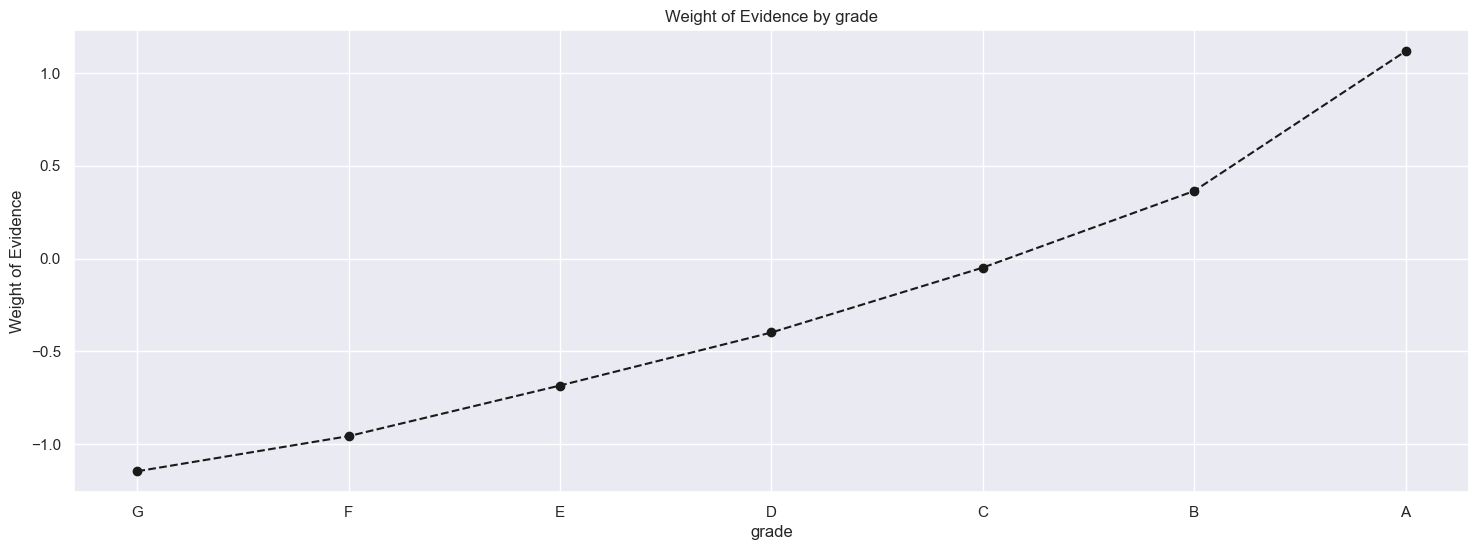

In [29]:
plot_by_woe(df_temp)

In [30]:
def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [31]:
df_temp = woe_ordered_continuous(X_train_prepr, 'term', y_train_prepr)
df_temp

,term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270199,0.903238,0.72434,244054.0,26145.0,0.73454,0.641217,0.135876,NaN,NaN,0.040794
1,60,102829,0.857735,0.27566,88200.0,14629.0,0.26546,0.358783,-0.301254,0.045503,0.43713,0.040794


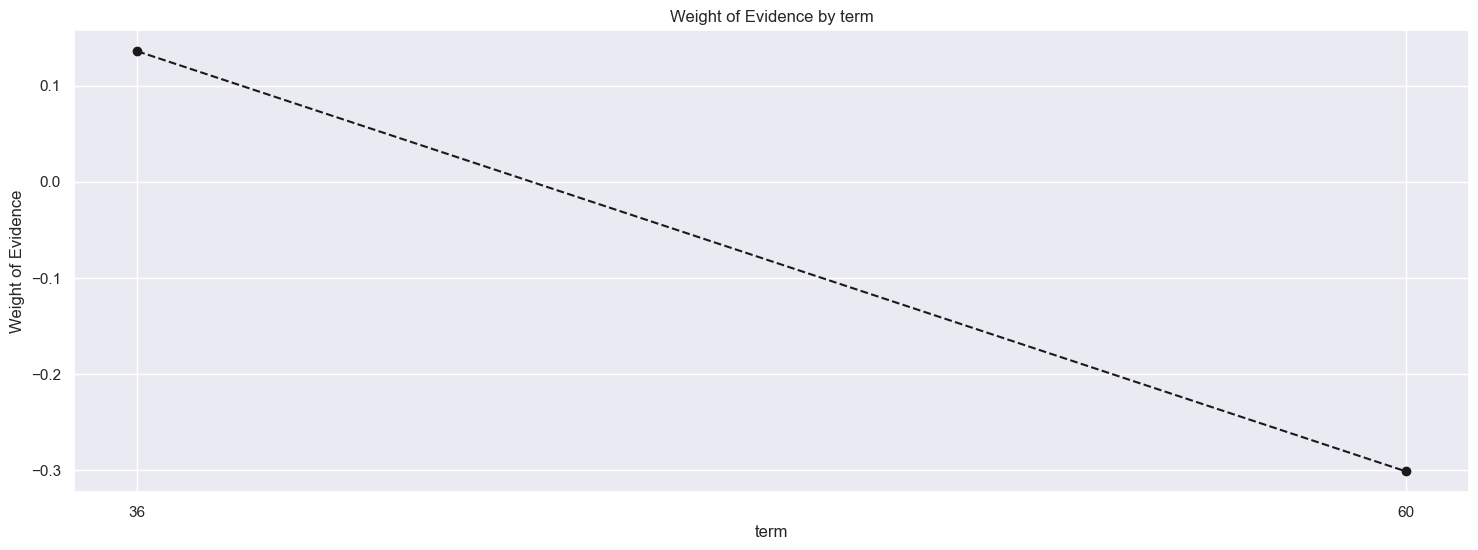

In [32]:
plot_by_woe(df_temp)

# WOE Numerical (Old)

In [33]:
def woe_ordered_continuous_IV(df2, continuous_variabe_name, y_df):
    df_temp = df2.copy()
    df = df2.copy()
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    # print("1")
    # print(df['IV'].unique()[0])
    if (df['IV'].unique()[0] in [np.inf , -np.inf]):
        # print("2")
        return woe_ordered_continuous_IV_recheck(df_temp, continuous_variabe_name, y_df)
    return df['IV'].unique()[0]
def woe_ordered_continuous_IV_recheck(df2, continuous_variabe_name, y_df):
    # df[continuous_variabe_name] = df[continuous_variabe_name].apply()
    df = df2.copy()
    df[continuous_variabe_name] = pd.cut(df[continuous_variabe_name],30)
    # df = df[continuous_variabe_name].apply(lambda x : x.mid)
    # print(df[continuous_variabe_name])
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    # print("3")
    # print(df['IV'].unique()[0])
    return df['IV'].unique()[0]

In [34]:
def woe_discrete_IV(df2, cat_variabe_name, y_df):
    df = df2.copy()
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df['IV'].unique()[0]

In [35]:
X_train_cat.columns

Index(['grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'initial_list_status', 'application_type'],
      dtype='object')

In [36]:
X_train_cat['grade'].unique()
X_train_cat['home_ownership'].unique()
X_train_cat['verification_status'].unique()
X_train_cat['pymnt_plan'].unique()
X_train_cat['purpose'].unique()
X_train_cat['addr_state'].unique()
X_train_cat['application_type'].unique()
X_train_cat['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [37]:
def Grade(df):
    condition = [(df['grade'].isin(["A","B","C","D"])),(~df['grade'].isin(["A","B","C","D"]))]
    criterion = [1,0]
    return np.select(condition,criterion)
def Home_ownership(df):
    condition = [(df['home_ownership'].isin(['OWN','MORTGAGE'])) , (~df['home_ownership'].isin(['OWN','MORTGAGE']))]
    criterion = [1,0]
    return np.select(condition,criterion)
def Verification(df):
    condition = [(df['verification_status'].isin(['Verified'])) , (~(df['verification_status'].isin(['Verified'])))]
    criterion = [1,0]
    return np.select(condition,criterion)
def pymnt_plan(df):
    condition = [(df['pymnt_plan']=='y') , (~(df['pymnt_plan']=='y'))]
    criterion = [1,0]
    return np.select(condition,criterion)
def purpose(df):
    condition = [(df['purpose'].isin(['debt_consolidation','credit_card'])) , (~df['purpose'].isin(['debt_consolidation','credit_card']))]
    criterion = [1,0]
    return np.select(condition,criterion)
def addr_state(df):
    condition = [(df['addr_state'].isin(['OH', 'NJ', 'NC', 'NM', 'AZ', 'CO', 'MA',
    'UT', 'GA', 'OR', 'SC', 'PA', 'IN', 'OK', 'MN', 'HI', 'MI', 'CT',
    'AK', 'MO', 'KY', 'AR', 'DC', 'KS', 'RI', 'LA', 'WY', 'MS', 'MT'])) , (~(df['addr_state'].isin(['OH', 'NJ', 'NC', 'NM', 'AZ', 'CO', 'MA',
    'UT', 'GA', 'OR', 'SC', 'PA', 'IN', 'OK', 'MN', 'HI', 'MI', 'CT',
    'AK', 'MO', 'KY', 'AR', 'DC', 'KS', 'RI', 'LA', 'WY', 'MS', 'MT'])))]
    criterion = [1,0]
    return np.select(condition,criterion)
def app_type(df):
    condition = [df['application_type'].isin(['INDIVIDUAL']) , df['application_type'].isnull()]
    criterion = [1,0]
    return np.select(condition,criterion)
def init_list_status(df):
    condition = [df['initial_list_status'].isin(['w']) , ~(df['initial_list_status'].isin(['w']))]
    criterion = [1,0]
    return np.select(condition,criterion)

In [38]:
X_train_cat['grade'] = Grade(X_train_cat)
X_train_cat['home_ownership'] = Home_ownership(X_train_cat)
X_train_cat['verification_status'] = Verification(X_train_cat)
X_train_cat['pymnt_plan'] = pymnt_plan(X_train_cat)
X_train_cat['purpose'] = purpose(X_train_cat)
X_train_cat['addr_state'] = addr_state(X_train_cat)
X_train_cat['application_type'] = app_type(X_train_cat)
X_train_cat['initial_list_status'] = init_list_status(X_train_cat)

In [39]:
X_train_cat[X_train_cat['grade']==1]

,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
456615,1,1,0,0,1,0,1,1
451541,1,1,1,0,0,0,0,1
394474,1,1,0,0,1,0,0,1
110294,1,1,0,0,1,0,1,1
139343,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
163633,1,1,1,0,1,0,0,1
399306,1,1,1,0,1,1,1,1
57787,1,1,1,0,1,1,0,1
81641,1,1,0,0,1,0,1,1


In [40]:
import numpy as np
import pandas as pd
# from pandas.core.arrays import algos
from scipy import stats
import re
import traceback
from pandas import Series
force_bin = 3   # กำหนดจำนวน bin ขั้นต่ำ
max_bin = 5     # จำนวน bin สูงสุด

# Function for binning numeric variables (monotonic binning)
def mono_bin(Y, X, n=max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X', 'Y']][df1.X.isnull()]
    notmiss = df1[['X', 'Y']][df1.X.notnull()]

    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({
                "X": notmiss.X,
                "Y": notmiss.Y,
                "Bucket": pd.qcut(notmiss.X, n)
            })
            d2 = d1.groupby('Bucket', as_index=True)
            r, _ = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n -= 1
        except Exception:
            n -= 1

    if len(d2) == 1:
        n = force_bin

    bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
    if len(np.unique(bins)) == 2:
        bins = np.insert(bins, 0, 1)

    bins[1] = bins[1] - (bins[1] / 2)

    d1 = pd.DataFrame({
        "X": notmiss.X,
        "Y": notmiss.Y,
        "Bucket": pd.cut(notmiss.X, np.unique(bins), include_lowest=True)
    })
    d2 = d1.groupby('Bucket', as_index=True)

    # Create bin summary
    d3 = pd.DataFrame({}, index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3 = d3.reset_index(drop=True)

    # Add missing values as a bin
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        # d3 = d3.append(d4, ignore_index=True)
        d3 = pd.concat([d3,d4],ignore_index=True)

    # Calculate metrics
    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"

    d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT',
             'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT',
             'DIST_NON_EVENT', 'WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return d3


# Function for binning categorical variables
def char_bin(Y, X):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X', 'Y']][df1.X.isnull()]
    notmiss = df1[['X', 'Y']][df1.X.notnull()]

    df2 = notmiss.groupby('X', as_index=True)
    d3 = pd.DataFrame({}, index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    # Add missing values as a bin
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE': np.nan}, index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        # d3 = d3.append(d4, ignore_index=True)
        d3 = pd.concat([d3,d4],ignore_index=True)

    # Calculate metrics
    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"

    d3 = d3[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT',
             'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT',
             'DIST_NON_EVENT', 'WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return d3


# Function to calculate IV for all variables in dataset
def data_vars(df1, target):
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i

            count += 1
            if count == 0:
                iv_df = conv
            else:
                iv_df = pd.concat([iv_df,conv], ignore_index=True)
                iv = pd.DataFrame({'IV': iv_df.groupby('VAR_NAME').IV.max()})
                iv = iv.reset_index()

    return iv_df, iv


In [41]:
df , iv=data_vars(X_train_num,y_train)

C:\Users\home\AppData\Local\Temp\ipykernel_21800\3738109303.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index=True)
C:\Users\home\AppData\Local\Temp\ipykernel_21800\3738109303.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 = d1.groupby('Bucket', as_index=True)
C:\Users\home\AppData\Local\Temp\ipykernel_21800\3738109303.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d2 

In [42]:
df

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,loan_amnt,500.000000,6000.0,64438,57824,0.897359,6614,0.102641,0.174036,0.162211,0.070360,0.001000
1,loan_amnt,6025.000000,35000.0,308590,274430,0.889303,34160,0.110697,0.825964,0.837789,-0.014214,0.001000
2,funded_amnt,500.000000,6000.0,64572,57930,0.897138,6642,0.102862,0.174355,0.162898,0.067967,0.000937
3,funded_amnt,6025.000000,35000.0,308456,274324,0.889346,34132,0.110654,0.825645,0.837102,-0.013781,0.000937
4,funded_amnt_inv,0.000000,6000.0,65909,58907,0.893763,7002,0.106237,0.177295,0.171727,0.031909,0.000215
...,...,...,...,...,...,...,...,...,...,...,...,...
64,mths_since_last_pymnt_d,55.000000,55.0,143778,143132,0.995507,646,0.004493,0.430791,0.015843,3.302868,1.597716
65,mths_since_last_pymnt_d,67.000000,163.0,229250,189122,0.824960,40128,0.175040,0.569209,0.984157,-0.547537,1.597716
66,mths_since_last_credit_pull_d,NaN,NaN,0,0,NaN,0,NaN,0.000000,0.000000,NaN,0.202857
67,mths_since_last_credit_pull_d,55.000000,55.0,262140,241350,0.920691,20790,0.079309,0.726402,0.509884,0.353921,0.202857


In [43]:
X_train_cat

,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
456615,1,1,0,0,1,0,1,1
451541,1,1,1,0,0,0,0,1
394474,1,1,0,0,1,0,0,1
110294,1,1,0,0,1,0,1,1
139343,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
163633,1,1,1,0,1,0,0,1
399306,1,1,1,0,1,1,1,1
57787,1,1,1,0,1,1,0,1
81641,1,1,0,0,1,0,1,1


In [44]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
df_feature_num = pd.DataFrame()
df_feature_cat = pd.DataFrame()
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_num.T)
X_scaled_cat = scaler.fit_transform(X_train_cat.T)
# k-means - Cluster
kmeans = KMeans(n_clusters=5, random_state=42)
df_feature_num['Cluster'] = pd.DataFrame(kmeans.fit_predict(X_scaled))
df_feature_num['Feature'] = X_train_num.T.index
df_feature_cat['Cluster'] = pd.DataFrame(kmeans.fit_predict(X_scaled_cat))
df_feature_cat['Feature'] = X_train_cat.T.index
# Feature Numerical or Interval
# PC1
results = []
cluster_scores = {}
for c in df_feature_num['Cluster'].unique():
    vars_in_cluster = df_feature_num.loc[df_feature_num['Cluster']==c,'Feature'].tolist()
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(X_train_num[vars_in_cluster])
    loadings = pd.Series(pca.components_[0], index=vars_in_cluster)
    cluster_scores[c] = loadings
# OC_R2
    for f in vars_in_cluster:
        r2_oc = np.corrcoef(X_train_num[f],pc1[:,0])[0,1] **2
        results.append({'Feature': f,'OC_R2': r2_oc})
results_df = pd.DataFrame(results)
# NC_R2
for idx , row in results_df.iterrows():
    o_cluster = df_feature_num['Cluster'].unique().tolist()
    max_r2 = 0
    for oc in o_cluster:
        features_in_oc = df_feature_num.loc[df_feature_num['Cluster']==c,'Feature'].tolist()
        pca = PCA(n_components=1)
        pc1 = pca.fit_transform(X_train_num[features_in_oc])
        r2 = np.corrcoef(X_train_num[row['Feature']],pc1[:,0])[0,1] ** 2
        if r2 > max_r2:
            max_r2 = r2
            # print(max_r2)
    results_df.loc[idx,'NC_R2'] = max_r2
pc_df = pd.DataFrame(cluster_scores)
pc_df = pc_df.reset_index().rename(columns={'index': 'Feature'})
df_results = pd.merge(df_feature_num,pc_df,on='Feature',how='left')
df_results = pd.merge(df_results,results_df,on='Feature',how='left')
# Feature Category
# PC1
results_2 = []
cluster_scores_2 = {}
for c in df_feature_cat['Cluster'].unique():
    vars_in_cluster = df_feature_cat.loc[df_feature_cat['Cluster']==c,'Feature'].tolist()
    pca = PCA(n_components=1)
    pc1 = pca.fit_transform(X_train_cat[vars_in_cluster])
    loadings = pd.Series(pca.components_[0], index=vars_in_cluster)
    cluster_scores_2[c] = loadings
# OC_R2
    for f in vars_in_cluster:
        r2_oc = np.corrcoef(X_train_cat[f],pc1[:,0])[0,1] **2
        results_2.append({'Feature': f,'OC_R2': r2_oc})
results_df = pd.DataFrame(results_2)
# NC_R2
for idx , row in results_df.iterrows():
    o_cluster = df_feature_cat['Cluster'].unique().tolist()
    max_r2 = 0
    for oc in o_cluster:
        features_in_oc = df_feature_cat.loc[df_feature_cat['Cluster']==c,'Feature'].tolist()
        pca = PCA(n_components=1)
        pc1 = pca.fit_transform(X_train_cat[features_in_oc])
        r2 = np.corrcoef(X_train_cat[row['Feature']],pc1[:,0])[0,1] ** 2
        if r2 > max_r2:
            max_r2 = r2
    results_df.loc[idx,'NC_R2'] = max_r2
pc_df = pd.DataFrame(cluster_scores)
pc_df = pc_df.reset_index().rename(columns={'index': 'Feature'})
df_results_2 = pd.merge(df_feature_cat,pc_df,on='Feature',how='left')
df_results_2 = pd.merge(df_results_2,results_df,on='Feature',how='left')
# 1-R2
df_results['1-R2_Ratio'] = (1 - df_results['OC_R2']) / (1 - df_results['NC_R2'])
# df_results_2['1-R2_Ratio'] = (1 - df_results_2['OC_R2']) / (1 - df_results_2['NC_R2'])
# IV
df_results['IV'] = np.nan
# df_results_2['IV'] = np.nan
for f in df_feature_num['Feature']:
    df_results.loc[df_results['Feature']==f,'IV']= woe_ordered_continuous_IV(X_train_num,f, y_train)
for f in df_feature_cat['Feature']:
    df_results_2.loc[df_results_2['Feature']==f,'IV']= woe_discrete_IV(X_train_cat,f, y_train)
# F - Stat
F_stat , p_values = f_classif(X_train_num , y_train)
df_results['F-Stats'] = F_stat
df_results['F-pvalue'] = p_values.round(decimals=10)
# Chi-Square -Stat
chi2_check = {}
df_results_2['Chi-Stats'] = np.nan
df_results_2['Chi-pvalue'] = np.nan
# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    # chi2_check.setdefault('Feature',[]).append(column)
    # chi2_check.setdefault('Chi-Stats',[]).append(chi)
    # chi2_check.setdefault('Chi-pvalue',[]).append(round(p, 10))
    df_results_2.loc[df_results_2['Feature']==column,'Chi-Stats'] = chi
    df_results_2.loc[df_results_2['Feature']==column,'Chi-pvalue'] = round(p,10)
# VIF of Num
results_vif = []
df_vif = pd.DataFrame()
for c in sorted(df_feature_num['Cluster'].unique()):
    vars_in_cluster = df_feature_num.loc[df_feature_num['Cluster'] == c, 'Feature'].tolist()
    X_sub = X_train_num[vars_in_cluster]
    if X_sub.shape[1] <= 1:
        # ถ้าใน cluster นี้มีแค่ 1 feature → ตั้งค่า VIF เป็น NaN
        temp_df = pd.DataFrame({
            'Cluster': c,
            'Feature': vars_in_cluster,
            'VIF': [np.nan]*len(vars_in_cluster)
        })
    else:
        # คำนวณ VIF ตามปกติ
        vif_values = [variance_inflation_factor(X_sub.values, i) for i in range(X_sub.shape[1])]
        temp_df = pd.DataFrame({
            'Cluster': c,
            'Feature': vars_in_cluster,
            'VIF': vif_values
        })
    results_vif.append(temp_df)
df_vif = pd.concat(results_vif,ignore_index=True)
df_results = pd.merge(df_results,df_vif[['Feature','VIF']],on='Feature',how='left')
# # VIF of Cat
results_vif = []
df_vif = pd.DataFrame()
for c in sorted(df_feature_cat['Cluster'].unique()):
    vars_in_cluster = df_feature_cat.loc[df_feature_cat['Cluster'] == c, 'Feature'].tolist()
    X_sub = X_train_cat[vars_in_cluster]
    if X_sub.shape[1] <= 1:
        # ถ้าใน cluster นี้มีแค่ 1 feature → ตั้งค่า VIF เป็น NaN
        temp_df = pd.DataFrame({
            'Cluster': c,
            'Feature': vars_in_cluster,
            'VIF': [np.nan]*len(vars_in_cluster)
        })
    else:
        # คำนวณ VIF ตามปกติ
        vif_values = [variance_inflation_factor(X_sub.values, i) for i in range(X_sub.shape[1])]
        temp_df = pd.DataFrame({
            'Cluster': c,
            'Feature': vars_in_cluster,
            'VIF': vif_values
        })
    results_vif.append(temp_df)
df_vif = pd.concat(results_vif,ignore_index=True)
df_results_2 = pd.merge(df_results_2,df_vif[['Feature','VIF']],on='Feature',how='left')

c:\Users\home\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


In [46]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'good_bad'],
      dtype='object')

In [47]:
# df_results_2 = df_results_2
df_results_2[['Cluster','Feature','OC_R2','NC_R2','IV','Chi-Stats','Chi-pvalue','VIF']]
df_results_2 = df_results_2.sort_values(ascending=False,by='Chi-Stats').head(5)
df_results_2 = df_results_2[df_results_2['VIF'].notnull()]
df_results_2 = df_results_2[~df_results_2['Feature'].isin(['initial_list_status'])]
df_results_2
X_new_cat = X_train_cat_u[df_results_2['Feature']]

In [48]:
# cluster_scores[1]
pd.options.display.float_format = '{:.2f}'.format
df_results = df_results
# df_results[['Cluster','Feature','OC_R2','NC_R2','1-R2_Ratio','IV','F-Stats','F-pvalue','VIF']]
# df_vif[['Feature','VIF']]
df_results = df_results[~(df_results['Feature'].isin(['total_pymnt_inv','out_prncp_inv']))]
df_results = df_results[~(df_results['IV'].isin([np.inf]))]
df_results.sort_values(ascending=False,by='F-Stats')
df_results = df_results.sort_values(ascending=False,by='F-Stats').head(5)
df_results
X_new_num =X_train_num_u[df_results['Feature']]

# WOE Binning (Old)

In [49]:
ref_categories = ['mths_since_last_credit_pull_d:>75', 'mths_since_issue_d:>122', 'mths_since_earliest_cr_line:>434', 'total_rev_hi_lim:>79,780', 
                  'total_rec_int:>7,260', 'total_pymnt:>25,000', 'out_prncp:>15,437', 'revol_util:>1.0', 'inq_last_6mths:>4', 'dti:>35.191', 
                  'annual_inc:>150K', 'int_rate:>20.281', 'term:60', 'purpose:major_purch__car__home_impr', 'verification_status:Not Verified', 
                  'home_ownership:MORTGAGE', 'grade:G']

In [50]:
# This custom class will create new categorical dummy features based on the cut-off points that we manually identified
# based on the WoE plots and IV above.
# Given the way it is structured, this class also allows a fit_transform method to be implemented on it, thereby allowing 
# us to use it as part of a scikit-learn Pipeline 
class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self, X): # no *args or *kargs
        self.X = X
    def fit(self, X, y = None):
        return self #nothing else to do
    def transform(self, X):
        X_new = X.loc[:, 'grade:A': 'grade:G']
        X_new['home_ownership:OWN'] = X.loc[:,'home_ownership:OWN']
        X_new['home_ownership:MORTGAGE'] = X.loc[:,'home_ownership:MORTGAGE']
        X_new['home_ownership:OTHER_NONE_RENT'] = sum([X['home_ownership:OTHER'], X['home_ownership:NONE'], X['home_ownership:RENT']])
        X_new = pd.concat([X_new, X.loc[:, 'verification_status:Not Verified':'verification_status:Verified']], axis = 1)
        # For the purpose of this column, we keep debt_consolidation (due to volume) and credit_card (due to unique characteristics) as separate cateogories
        # These categories have very few observations: educational, renewable_energy, vacation, house, wedding, car
        # car is the least risky so we will combine it with the other 2 least risky categories: home_improvement and major_purchase
        # educational, renewable_energy (both low observations) will be combined with small_business and moving
        # vacation, house and wedding (remaining 3 with low observations) will be combined with medical and other
        X_new['purpose:debt_consolidation'] = X.loc[:,'purpose:debt_consolidation']
        X_new['purpose:credit_card'] = X.loc[:,'purpose:credit_card']
        X_new['purpose:major_purch__car__home_impr'] = sum([X['purpose:major_purchase'], X['purpose:car'], X['purpose:home_improvement']])
        X_new['purpose:educ__ren_en__sm_b__mov'] = sum([X['purpose:educational'], X['purpose:renewable_energy'], X['purpose:small_business'], 
                                                        X['purpose:moving']])
        X_new['purpose:vacation__house__wedding__med__oth'] = sum([X['purpose:vacation'], X['purpose:house'], X['purpose:wedding'], 
                                                                   X['purpose:medical'], X['purpose:other']])
        X_new['term:36'] = np.where((X['term'] == 36), 1, 0)
        X_new['term:60'] = np.where((X['term'] == 60), 1, 0)
        X_new['int_rate:<7.071'] = np.where((X['int_rate'] <= 7.071), 1, 0)
        X_new['int_rate:7.071-10.374'] = np.where((X['int_rate'] > 7.071) & (X['int_rate'] <= 10.374), 1, 0)
        X_new['int_rate:10.374-13.676'] = np.where((X['int_rate'] > 10.374) & (X['int_rate'] <= 13.676), 1, 0)
        X_new['int_rate:13.676-15.74'] = np.where((X['int_rate'] > 13.676) & (X['int_rate'] <= 15.74), 1, 0)
        X_new['int_rate:15.74-20.281'] = np.where((X['int_rate'] > 15.74) & (X['int_rate'] <= 20.281), 1, 0)
        X_new['int_rate:>20.281'] = np.where((X['int_rate'] > 20.281), 1, 0)
        X_new['annual_inc:missing'] = np.where(X['annual_inc'].isnull(), 1, 0)
        X_new['annual_inc:<28,555'] = np.where((X['annual_inc'] <= 28555), 1, 0)
        X_new['annual_inc:28,555-37,440'] = np.where((X['annual_inc'] > 28555) & (X['annual_inc'] <= 37440), 1, 0)
        X_new['annual_inc:37,440-61,137'] = np.where((X['annual_inc'] > 37440) & (X['annual_inc'] <= 61137), 1, 0)
        X_new['annual_inc:61,137-81,872'] = np.where((X['annual_inc'] > 61137) & (X['annual_inc'] <= 81872), 1, 0)
        X_new['annual_inc:81,872-102,606'] = np.where((X['annual_inc'] > 81872) & (X['annual_inc'] <= 102606), 1, 0)
        X_new['annual_inc:102,606-120,379'] = np.where((X['annual_inc'] > 102606) & (X['annual_inc'] <= 120379), 1, 0)
        X_new['annual_inc:120,379-150,000'] = np.where((X['annual_inc'] > 120379) & (X['annual_inc'] <= 150000), 1, 0)
        X_new['annual_inc:>150K'] = np.where((X['annual_inc'] > 150000), 1, 0)
        X_new['dti:<=1.6'] = np.where((X['dti'] <= 1.6), 1, 0)
        X_new['dti:1.6-5.599'] = np.where((X['dti'] > 1.6) & (X['dti'] <= 5.599), 1, 0)
        X_new['dti:5.599-10.397'] = np.where((X['dti'] > 5.599) & (X['dti'] <= 10.397), 1, 0)
        X_new['dti:10.397-15.196'] = np.where((X['dti'] > 10.397) & (X['dti'] <= 15.196), 1, 0)
        X_new['dti:15.196-19.195'] = np.where((X['dti'] > 15.196) & (X['dti'] <= 19.195), 1, 0)
        X_new['dti:19.195-24.794'] = np.where((X['dti'] > 19.195) & (X['dti'] <= 24.794), 1, 0)
        X_new['dti:24.794-35.191'] = np.where((X['dti'] > 24.794) & (X['dti'] <= 35.191), 1, 0)
        X_new['dti:>35.191'] = np.where((X['dti'] > 35.191), 1, 0)
        X_new['inq_last_6mths:missing'] = np.where(X['inq_last_6mths'].isnull(), 1, 0)
        X_new['inq_last_6mths:0'] = np.where((X['inq_last_6mths'] == 0), 1, 0)
        X_new['inq_last_6mths:1-2'] = np.where((X['inq_last_6mths'] >= 1) & (X['inq_last_6mths'] <= 2), 1, 0)
        X_new['inq_last_6mths:3-4'] = np.where((X['inq_last_6mths'] >= 3) & (X['inq_last_6mths'] <= 4), 1, 0)
        X_new['inq_last_6mths:>4'] = np.where((X['inq_last_6mths'] > 4), 1, 0)
        # We will discretize on the deciles for revol_util
        X_new['revol_util:missing'] = np.where(X['revol_util'].isnull(), 1, 0)
        X_new['revol_util:<0.1'] = np.where((X['revol_util'] <= 0.1), 1, 0)
        X_new['revol_util:0.1-0.2'] = np.where((X['revol_util'] > 0.1) & (X['revol_util'] <= 0.2), 1, 0)
        X_new['revol_util:0.2-0.3'] = np.where((X['revol_util'] > 0.2) & (X['revol_util'] <= 0.3), 1, 0)
        X_new['revol_util:0.3-0.4'] = np.where((X['revol_util'] > 0.3) & (X['revol_util'] <= 0.4), 1, 0)
        X_new['revol_util:0.4-0.5'] = np.where((X['revol_util'] > 0.4) & (X['revol_util'] <= 0.5), 1, 0)
        X_new['revol_util:0.5-0.6'] = np.where((X['revol_util'] > 0.5) & (X['revol_util'] <= 0.6), 1, 0)
        X_new['revol_util:0.6-0.7'] = np.where((X['revol_util'] > 0.6) & (X['revol_util'] <= 0.7), 1, 0)
        X_new['revol_util:0.7-0.8'] = np.where((X['revol_util'] > 0.7) & (X['revol_util'] <= 0.8), 1, 0)
        X_new['revol_util:0.8-0.9'] = np.where((X['revol_util'] > 0.8) & (X['revol_util'] <= 0.9), 1, 0)
        X_new['revol_util:0.9-1.0'] = np.where((X['revol_util'] > 0.9) & (X['revol_util'] <= 1.0), 1, 0)
        X_new['revol_util:>1.0'] = np.where((X['revol_util'] > 1.0), 1, 0)
        X_new['out_prncp:<1,286'] = np.where((X['out_prncp'] <= 1286), 1, 0)
        X_new['out_prncp:1,286-6,432'] = np.where((X['out_prncp'] > 1286) & (X['out_prncp'] <= 6432), 1, 0)
        X_new['out_prncp:6,432-9,005'] = np.where((X['out_prncp'] > 6432) & (X['out_prncp'] <= 9005), 1, 0)
        X_new['out_prncp:9,005-10,291'] = np.where((X['out_prncp'] > 9005) & (X['out_prncp'] <= 10291), 1, 0)
        X_new['out_prncp:10,291-15,437'] = np.where((X['out_prncp'] > 10291) & (X['out_prncp'] <= 15437), 1, 0)
        X_new['out_prncp:>15,437'] = np.where((X['out_prncp'] > 15437), 1, 0)
        X_new['total_pymnt:<10,000'] = np.where((X['total_pymnt'] <= 10000), 1, 0)
        X_new['total_pymnt:10,000-15,000'] = np.where((X['total_pymnt'] > 10000) & (X['total_pymnt'] <= 15000), 1, 0)
        X_new['total_pymnt:15,000-20,000'] = np.where((X['total_pymnt'] > 15000) & (X['total_pymnt'] <= 20000), 1, 0)
        X_new['total_pymnt:20,000-25,000'] = np.where((X['total_pymnt'] > 20000) & (X['total_pymnt'] <= 25000), 1, 0)
        X_new['total_pymnt:>25,000'] = np.where((X['total_pymnt'] > 25000), 1, 0)
        X_new['total_rec_int:<1,089'] = np.where((X['total_rec_int'] <= 1089), 1, 0)
        X_new['total_rec_int:1,089-2,541'] = np.where((X['total_rec_int'] > 1089) & (X['total_rec_int'] <= 2541), 1, 0)
        X_new['total_rec_int:2,541-4,719'] = np.where((X['total_rec_int'] > 2541) & (X['total_rec_int'] <= 4719), 1, 0)
        X_new['total_rec_int:4,719-7,260'] = np.where((X['total_rec_int'] > 4719) & (X['total_rec_int'] <= 7260), 1, 0)
        X_new['total_rec_int:>7,260'] = np.where((X['total_rec_int'] > 7260), 1, 0)
        X_new['total_rev_hi_lim:missing'] = np.where(X['total_rev_hi_lim'].isnull(), 1, 0)
        X_new['total_rev_hi_lim:<6,381'] = np.where((X['total_rev_hi_lim'] <= 6381), 1, 0)
        X_new['total_rev_hi_lim:6,381-19,144'] = np.where((X['total_rev_hi_lim'] > 6381) & (X['total_rev_hi_lim'] <= 19144), 1, 0)
        X_new['total_rev_hi_lim:19,144-25,525'] = np.where((X['total_rev_hi_lim'] > 19144) & (X['total_rev_hi_lim'] <= 25525), 1, 0)
        X_new['total_rev_hi_lim:25,525-35,097'] = np.where((X['total_rev_hi_lim'] > 25525) & (X['total_rev_hi_lim'] <= 35097), 1, 0)
        X_new['total_rev_hi_lim:35,097-54,241'] = np.where((X['total_rev_hi_lim'] > 35097) & (X['total_rev_hi_lim'] <= 54241), 1, 0)
        X_new['total_rev_hi_lim:54,241-79,780'] = np.where((X['total_rev_hi_lim'] > 54241) & (X['total_rev_hi_lim'] <= 79780), 1, 0)
        X_new['total_rev_hi_lim:>79,780'] = np.where((X['total_rev_hi_lim'] > 79780), 1, 0)
        X_new['mths_since_earliest_cr_line:missing'] = np.where(X['mths_since_earliest_cr_line'].isnull(), 1, 0)
        X_new['mths_since_earliest_cr_line:<125'] = np.where((X['mths_since_earliest_cr_line'] <= 125), 1, 0)
        X_new['mths_since_earliest_cr_line:125-167'] = np.where((X['mths_since_earliest_cr_line'] > 125) & (X['mths_since_earliest_cr_line'] <= 167), 1, 0)
        X_new['mths_since_earliest_cr_line:167-249'] = np.where((X['mths_since_earliest_cr_line'] > 167) & (X['mths_since_earliest_cr_line'] <= 249), 1, 0)
        X_new['mths_since_earliest_cr_line:249-331'] = np.where((X['mths_since_earliest_cr_line'] > 249) & (X['mths_since_earliest_cr_line'] <= 331), 1, 0)
        X_new['mths_since_earliest_cr_line:331-434'] = np.where((X['mths_since_earliest_cr_line'] > 331) & (X['mths_since_earliest_cr_line'] <= 434), 1, 0)
        X_new['mths_since_earliest_cr_line:>434'] = np.where((X['mths_since_earliest_cr_line'] > 434), 1, 0)
        X_new['mths_since_issue_d:<79'] = np.where((X['mths_since_issue_d'] <= 79), 1, 0)
        X_new['mths_since_issue_d:79-89'] = np.where((X['mths_since_issue_d'] > 79) & (X['mths_since_issue_d'] <= 89), 1, 0)
        X_new['mths_since_issue_d:89-100'] = np.where((X['mths_since_issue_d'] > 89) & (X['mths_since_issue_d'] <= 100), 1, 0)
        X_new['mths_since_issue_d:100-122'] = np.where((X['mths_since_issue_d'] > 100) & (X['mths_since_issue_d'] <= 122), 1, 0)
        X_new['mths_since_issue_d:>122'] = np.where((X['mths_since_issue_d'] > 122), 1, 0)
        X_new['mths_since_last_credit_pull_d:missing'] = np.where(X['mths_since_last_credit_pull_d'].isnull(), 1, 0)
        X_new['mths_since_last_credit_pull_d:<56'] = np.where((X['mths_since_last_credit_pull_d'] <= 56), 1, 0)
        X_new['mths_since_last_credit_pull_d:56-61'] = np.where((X['mths_since_last_credit_pull_d'] > 56) & (X['mths_since_last_credit_pull_d'] <= 61), 1, 0)
        X_new['mths_since_last_credit_pull_d:61-75'] = np.where((X['mths_since_last_credit_pull_d'] > 61) & (X['mths_since_last_credit_pull_d'] <= 75), 1, 0)
        X_new['mths_since_last_credit_pull_d:>75'] = np.where((X['mths_since_last_credit_pull_d'] > 75), 1, 0)
        X_new.drop(columns = ref_categories, inplace = True)
        return X_new
# we could have also structured this class without the last drop statement and without creating categories out of the 
# feature categories. But doing the way we have done here allows us to keep a proper track of the categories, if required

# Coarse Classing (Old)

In [51]:
loan_data.columns
X_train_cat

,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
456615,1,1,0,0,1,0,1,1
451541,1,1,1,0,0,0,0,1
394474,1,1,0,0,1,0,0,1
110294,1,1,0,0,1,0,1,1
139343,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
163633,1,1,1,0,1,0,0,1
399306,1,1,1,0,1,1,1,1
57787,1,1,1,0,1,1,0,1
81641,1,1,0,0,1,0,1,1


In [52]:
roll_rate = loan_data.copy()

In [53]:
# --- Step 1: เตรียม DPD ประมาณเอง ---
# สมมติว่า installment คือยอดชำระรายเดือน
# ถ้ามียอดค้าง out_prncp มากกว่ายอดผ่อนรายเดือน แปลว่าค้างชำระ
roll_rate['dpd_est'] = (roll_rate['out_prncp'] / roll_rate['installment']).fillna(0) * 30
roll_rate['dpd_est'] = roll_rate['dpd_est'].clip(0, 120)  # limit ไม่ให้เกิน 120 วัน

# --- Step 2: ทำ Buckets ---
def bucket_dpd(x):
    if x == 0:
        return 0  # current
    elif 0 < x <= 30:
        return 1
    elif 30 < x <= 60:
        return 2
    elif 60 < x <= 90:
        return 3
    else:
        return 4  # bad

roll_rate['bucket'] = roll_rate['dpd_est'].apply(bucket_dpd)

# --- Step 3: ใช้ good_bad เป็น final state ---
# good_bad: 0=good, 1=bad
roll_rate['final_state'] = np.where(roll_rate['good_bad'] == 1, 4, roll_rate['bucket'])

# --- Step 4: สร้าง Transition Matrix ---
# จำลอง transition (ในความเป็นจริงต้องมี data panel หลายเดือน แต่ dataset นี้ snapshot เดียว)
# ที่นี่จะนับเป็น "bucket เริ่มต้น" เทียบกับ "final state"
transition = pd.crosstab(roll_rate['bucket'], roll_rate['final_state'], normalize='index') * 100

print("Transition Matrix (%)")
print(transition.round(2))

Transition Matrix (%)
final_state     0    1    2    3      4
bucket                                 
0           18.80 0.00 0.00 0.00  81.20
1            0.00 1.61 0.00 0.00  98.39
2            0.00 0.00 1.90 0.00  98.10
3            0.00 0.00 0.00 2.05  97.95
4            0.00 0.00 0.00 0.00 100.00


In [54]:
X_new_cat

,grade,purpose
456615,A,credit_card
451541,D,other
394474,D,credit_card
110294,A,debt_consolidation
139343,B,debt_consolidation
...,...,...
163633,C,debt_consolidation
399306,B,credit_card
57787,C,debt_consolidation
81641,C,debt_consolidation


In [55]:
X_new_num

,mths_since_last_pymnt_d,int_rate,mths_since_last_credit_pull_d,mths_since_issue_d,term
456615,67.00,8.90,55.00,79,36
451541,55.00,18.25,55.00,79,60
394474,55.00,18.92,55.00,79,60
110294,67.00,6.03,67.00,91,36
139343,79.00,12.12,55.00,91,36
...,...,...,...,...,...
163633,55.00,16.29,55.00,91,60
399306,55.00,12.49,55.00,79,36
57787,67.00,14.30,67.00,91,60
81641,55.00,15.10,55.00,91,36


In [56]:
X_new_num.columns

Index(['mths_since_last_pymnt_d', 'int_rate', 'mths_since_last_credit_pull_d',
       'mths_since_issue_d', 'term'],
      dtype='object')

In [57]:
df_num_ , df_num_iv = data_vars(X_new_num, y_train)
df_cat_  = char_bin(y_train, X_new_cat['purpose'])

In [58]:
df_num_

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,mths_since_last_pymnt_d,55.00,55.00,143778,143132.00,1.00,646.00,0.00,0.43,0.02,3.30,1.59
1,mths_since_last_pymnt_d,67.00,163.00,228939,189122.00,0.83,39817.00,0.17,0.57,0.98,-0.54,1.59
2,mths_since_last_pymnt_d,NaN,NaN,311,0.00,0.00,311.00,1.00,0.00,0.01,0.00,1.59
3,int_rate,5.42,6.76,17156,16726.00,0.97,430.00,0.03,0.05,0.01,1.56,0.06
4,int_rate,6.91,26.06,355872,315528.00,0.89,40344.00,0.11,0.95,0.99,-0.04,0.06
5,mths_since_last_credit_pull_d,NaN,NaN,0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.20
6,mths_since_last_credit_pull_d,55.00,55.00,262140,241350.00,0.92,20790.00,0.08,0.73,0.51,0.35,0.20
7,mths_since_last_credit_pull_d,67.00,163.00,110858,90877.00,0.82,19981.00,0.18,0.27,0.49,-0.58,0.20
8,mths_since_last_credit_pull_d,NaN,NaN,30,27.00,0.90,3.00,0.10,0.00,0.00,0.10,0.20
9,mths_since_issue_d,NaN,NaN,0,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.08


In [59]:
df_cat_

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,car,car,4246,3869,0.91,377,0.09,0.01,0.01,0.23,0.04
1,VAR,credit_card,credit_card,83329,76148,0.91,7181,0.09,0.23,0.18,0.26,0.04
2,VAR,debt_consolidation,debt_consolidation,219196,194362,0.89,24834,0.11,0.58,0.61,-0.04,0.04
3,VAR,educational,educational,351,278,0.79,73,0.21,0.00,0.00,-0.76,0.04
4,VAR,home_improvement,home_improvement,21253,19162,0.90,2091,0.10,0.06,0.05,0.12,0.04
5,VAR,house,house,1824,1571,0.86,253,0.14,0.00,0.01,-0.27,0.04
6,VAR,major_purchase,major_purchase,7873,7127,0.91,746,0.09,0.02,0.02,0.16,0.04
7,VAR,medical,medical,3750,3238,0.86,512,0.14,0.01,0.01,-0.25,0.04
8,VAR,moving,moving,2397,2034,0.85,363,0.15,0.01,0.01,-0.37,0.04
9,VAR,other,other,19006,16377,0.86,2629,0.14,0.05,0.06,-0.27,0.04


In [60]:
df_cat_

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,car,car,4246,3869,0.91,377,0.09,0.01,0.01,0.23,0.04
1,VAR,credit_card,credit_card,83329,76148,0.91,7181,0.09,0.23,0.18,0.26,0.04
2,VAR,debt_consolidation,debt_consolidation,219196,194362,0.89,24834,0.11,0.58,0.61,-0.04,0.04
3,VAR,educational,educational,351,278,0.79,73,0.21,0.00,0.00,-0.76,0.04
4,VAR,home_improvement,home_improvement,21253,19162,0.90,2091,0.10,0.06,0.05,0.12,0.04
5,VAR,house,house,1824,1571,0.86,253,0.14,0.00,0.01,-0.27,0.04
6,VAR,major_purchase,major_purchase,7873,7127,0.91,746,0.09,0.02,0.02,0.16,0.04
7,VAR,medical,medical,3750,3238,0.86,512,0.14,0.01,0.01,-0.25,0.04
8,VAR,moving,moving,2397,2034,0.85,363,0.15,0.01,0.01,-0.37,0.04
9,VAR,other,other,19006,16377,0.86,2629,0.14,0.05,0.06,-0.27,0.04


In [61]:
df_grade =woe_discrete(X_new_cat,"grade", y_train)
df_purpose =woe_discrete(X_new_cat,"purpose", y_train)
df_mslpd = woe_ordered_continuous(X_new_num,"mths_since_last_pymnt_d", y_train)
df_ir = woe_ordered_continuous(X_new_num,"int_rate", y_train)
df_mslcpd = woe_ordered_continuous(X_new_num,"mths_since_last_credit_pull_d", y_train)
df_msid = woe_ordered_continuous(X_new_num,"mths_since_issue_d", y_train)
df_term = woe_ordered_continuous(X_new_num,"term", y_train)

In [62]:
df_grade = df_grade.sort_values(by='grade',ascending=True).reset_index(drop=True)

In [63]:
df_grade['bin'] = range(1,len(df_grade)+1)

In [64]:
df_grade['bad_rate'] = (df_grade['n_bad'] / df_grade['n_good']) * 100

In [65]:
df_grade['Basket'] = range(1,len(df_grade) + 1)

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grade[['n_bad']])
# k-means - Cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df_grade['New Basket'] = pd.DataFrame(kmeans.fit_predict(X_scaled))

In [67]:
# Means bad rate
df_grade['Means'] = df_grade.groupby('New Basket')['bad_rate'].transform('mean')

In [68]:
df_grade[['bin','grade','n_good','n_bad','WoE','bad_rate','Basket','New Basket','Means']]

,bin,grade,n_good,n_bad,WoE,bad_rate,Basket,New Basket,Means
0,1,A,57499.00,2311.00,1.12,4.02,1,1,24.83
1,2,B,100752.00,8592.00,0.36,8.53,2,2,17.03
2,3,C,88890.00,11452.00,-0.05,12.88,3,0,12.88
3,4,D,52180.00,9533.00,-0.40,18.27,4,2,17.03
4,5,E,23000.00,5590.00,-0.68,24.30,5,2,17.03
5,6,F,8040.00,2566.00,-0.96,31.92,6,1,24.83
6,7,G,1893.00,730.00,-1.14,38.56,7,1,24.83


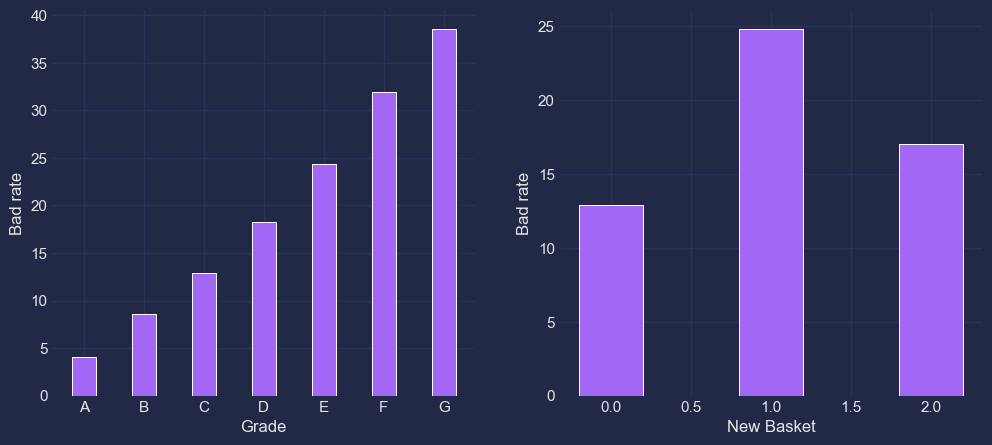

In [69]:
import matplotlib.pyplot as plt
import matplotx

with plt.style.context(matplotx.styles.pitaya_smoothie['dark']):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
    axes[0].bar(df_grade['grade'],df_grade['bad_rate'],width=0.4, edgecolor="white", linewidth=0.7)
    axes[0].set_xlabel('Grade')
    axes[0].set_ylabel('Bad rate')
    axes[1].bar(df_grade['New Basket'],df_grade['Means'],width=0.4, edgecolor="white", linewidth=0.7)
    axes[1].set_xlabel('New Basket')
    axes[1].set_ylabel('Bad rate')
    plt.show()

# Logisit Regression Model (Old)

In [70]:
X_new_all = pd.concat([X_train_num[df_results['Feature']].T,X_train_cat[df_results_2['Feature']].T],ignore_index=False)

In [71]:
X_new_all = X_new_all.T

In [72]:
X_new_all

,mths_since_last_pymnt_d,int_rate,mths_since_last_credit_pull_d,mths_since_issue_d,term,grade,purpose
456615,67.00,8.90,55.00,79.00,36.00,1.00,1.00
451541,55.00,18.25,55.00,79.00,60.00,1.00,0.00
394474,55.00,18.92,55.00,79.00,60.00,1.00,1.00
110294,67.00,6.03,67.00,91.00,36.00,1.00,1.00
139343,79.00,12.12,55.00,91.00,36.00,1.00,1.00
...,...,...,...,...,...,...,...
163633,55.00,16.29,55.00,91.00,60.00,1.00,1.00
399306,55.00,12.49,55.00,79.00,36.00,1.00,1.00
57787,67.00,14.30,67.00,91.00,60.00,1.00,1.00
81641,55.00,15.10,55.00,91.00,36.00,1.00,1.00


In [83]:
from sklearn.metrics import roc_curve
# define modeling pipeline
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')
woe_transform = X_new_all
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', reg)])

# define cross-validation criteria. RepeatedStratifiedKFold automatially takes care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, X_new_all, y_train, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# Predict probabilities for the test set using cross-validated pipeline
pipeline.fit(X_new_all, y_train)
y_hat_test_proba = pipeline.predict_proba(X_new_all)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_hat_test_proba)
ks_value = max(tpr - fpr)

print(f"KS Statistic: {ks_value:.4f}")

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

KS Statistic: 0.4866
Mean AUROC: 0.8049
Gini: 0.6099


In [80]:
# pretty impressive scores for the first time, now let's fit the pipeline on the whole training set
pipeline.fit(X_new_all, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [81]:

feature_name = X_new_all.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(pipeline['model'].coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', pipeline['model'].intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,0.52
1,mths_since_last_pymnt_d,-1.55
2,int_rate,-0.69
3,mths_since_last_credit_pull_d,0.07
4,mths_since_issue_d,0.73
5,term,-0.04
6,grade,-0.12
7,purpose,-0.06


In [109]:
display(X_test[X_new_all.columns])

,mths_since_last_pymnt_d,int_rate,mths_since_last_credit_pull_d,mths_since_issue_d,term,grade,purpose
395346,67.00,14.64,55.00,79,36,0,0
376583,55.00,7.12,55.00,79,36,0,0
297790,67.00,14.99,55.00,79,36,0,0
47347,67.00,9.67,67.00,91,36,0,0
446772,79.00,18.25,67.00,79,60,0,0
...,...,...,...,...,...,...,...
32147,91.00,6.39,91.00,127,36,0,0
78936,55.00,19.52,55.00,91,36,0,0
459582,55.00,23.40,55.00,79,36,0,0
454915,67.00,15.61,55.00,79,60,0,0


In [110]:
for i in X_new_all.columns:
    X_test[i] = X_test[i].fillna(0)

In [111]:
# make preditions on our test set
y_hat_test = pipeline.predict(X_test[X_new_all.columns])
# get the predicted probabilities
y_hat_test_proba = pipeline.predict_proba(X_test[X_new_all.columns])
# select the probabilities of only the positive class (class 1 - default) 
y_hat_test_proba = y_hat_test_proba[:][: , 1]

In [112]:
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

(93257, 2)

In [113]:
# Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
395346,1,0.59
376583,1,0.95
297790,1,0.58
47347,1,0.86
446772,0,0.18


In [114]:
# assign a threshold value to differentiate good with bad
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.06091768, 0.04839315],
       [0.15198859, 0.73870058]])

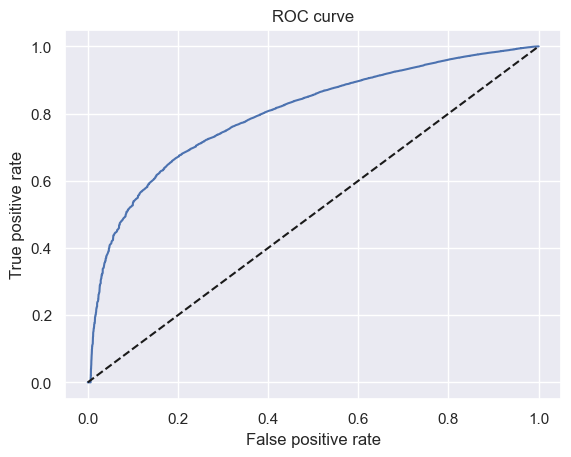

In [115]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [116]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
display(AUROC)
Gini = AUROC * 2 -1
display(Gini)

0.7986746563237842

0.5973493126475684

Text(0.5, 1.0, 'PR curve')

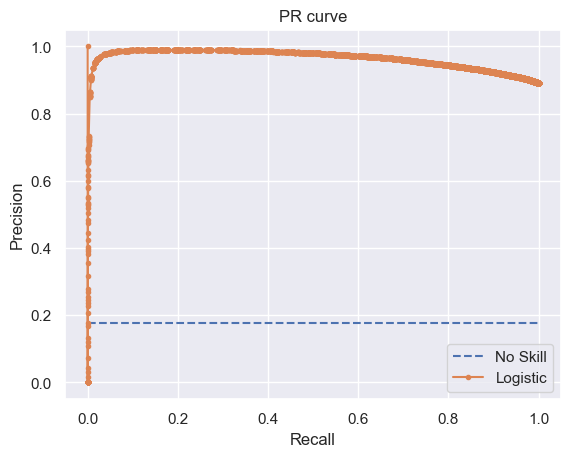

In [117]:
# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve')

In [118]:
# calculate PR AUC
auc_pr = auc(recall, precision)
auc_pr

0.964545130732108

In [119]:
summary_table

,Feature name,Coefficients
0,Intercept,0.52
1,mths_since_last_pymnt_d,-1.55
2,int_rate,-0.69
3,mths_since_last_credit_pull_d,0.07
4,mths_since_issue_d,0.73
5,term,-0.04
6,grade,-0.12
7,purpose,-0.06


In [ ]:
# Define the min and max threshholds for our scorecard
min_score = 300
max_score = 850
# calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = summary_table.groupby('Feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within theFeature Nameoriginal feature name
max_sum_coef = summary_table.groupby('Feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the mFeature Namecoefficient by the ratio of the differences between
# maximum & minimum score and maximum & minimum sum of cefficients.
print(f"min_sum_coef: {min_sum_coef}")
print(f"max_sum_coef: {max_sum_coef}")
print(f"Difference: {max_sum_coef - min_sum_coef}")
# summary_table['Score - Calculation'] = summary_table['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
denominator = max_sum_coef - min_sum_coef
if denominator == 0:
    # กำหนดให้ Score - Calculation เป็น 0 หรือค่าเริ่มต้นอื่น ๆ ที่เหมาะสม
    summary_table['Score - Calculation'] = 0 
else:
    summary_table['Score - Calculation'] = summary_table['Coefficients'] * (max_score - min_score) / denominator
# update the calculated score of the Intercept (i.e. the default score for each loan)
summary_table.loc[0, 'Score - Calculation'] = ((summary_table.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# summary_table['Score - Calculation'] = (summary_table['Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef) * (max_score - min_score) + min_score
# round the values of the 'Score - Calculation' column and store them in a new column
summary_table['Score - Preliminary'] = summary_table['Score - Calculation'].round()
summary_table

min_sum_coef: -1.1492300301753415
max_sum_coef: -1.1492300301753415
Difference: 0.0


,Feature name,Coefficients,Score - Calculation,Score - Preliminary
0,Intercept,0.52,inf,inf
1,mths_since_last_pymnt_d,-1.55,0.00,0.00
2,int_rate,-0.69,0.00,0.00
3,mths_since_last_credit_pull_d,0.07,0.00,0.00
4,mths_since_issue_d,0.73,0.00,0.00
5,term,-0.04,0.00,0.00
6,grade,-0.12,0.00,0.00
7,purpose,-0.06,0.00,0.00


In [133]:
min_score = 300
max_score = 850
denominator = max_sum_coef - min_sum_coef

if denominator == 0:
    # หากไม่มีความแปรผัน ให้กำหนดคะแนนเริ่มต้นเป็น min_score หรือค่าเฉลี่ย
    summary_table['Score - Calculation'] = min_score # หรือ (min_score + max_score) / 2
    
    # ต้องอัปเดต Intercept ด้วย (ถ้า Intercept มีอยู่จริง)
    # เราสามารถกำหนดให้ Intercept เป็นคะแนนเฉลี่ยเพื่อให้สมเหตุสมผล
    summary_table.loc[0, 'Score - Calculation'] = (max_score + min_score) / 2
else:
    # สูตร Min-Max Scaling ที่สมบูรณ์
    summary_table['Score - Calculation'] = ((summary_table['Coefficients'] - min_sum_coef) / denominator) * (max_score - min_score) + min_score

# นำไปปัดเศษตามปกติ
summary_table['Score - Preliminary'] = summary_table['Score - Calculation'].round()

In [134]:
summary_table

,Feature name,Coefficients,Score - Calculation,Score - Preliminary
0,Intercept,0.52,575,575
1,mths_since_last_pymnt_d,-1.55,300,300
2,int_rate,-0.69,300,300
3,mths_since_last_credit_pull_d,0.07,300,300
4,mths_since_issue_d,0.73,300,300
5,term,-0.04,300,300
6,grade,-0.12,300,300
7,purpose,-0.06,300,300
